In [236]:
import os
import matplotlib.pyplot as plt
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
%config IPCompleter.greedy=True

In [237]:
import io
import os
import requests
import pandas as pd
from pandas import IndexSlice as idx
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas.io.sql
import pyodbc
import ptitprince as pt
import seaborn as sns
import colorama
from colorama import Fore
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, date2num
import matplotlib.dates as mdates

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import findspark
findspark.init()
import databricks.koalas as ks
from pyspark.sql import SparkSession

#from pyspark.sql import SparkSession
#SPARK_KOALAS_AUTOPATCH=false

from datetime import datetime
from datetime import date #importamos date

from mpl_toolkits.mplot3d import Axes3D

#import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf

#import vaex
#import lux
#import pandas_profiling
#from pandas_profiling import ProfileReport
# print(sns.__version__)

In [238]:
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 1000)

In [239]:
os.getcwd()

'C:\\Users\\dscriollo\\Documents\\Notebooks\\BK_Equifax'

In [240]:
from os import listdir
from os.path import isfile, join
#path = r'\\172.16.2.166\Riesgo_Estructural\analistas\Danilo_Criollo\Modelo score micro pn\Base_Generada_Scoring'
path = r'C:\\Users\\dscriollo\\Documents\\Notebooks\\BK_Equifax'
os.listdir(path)

['.ipynb_checkpoints',
 'Acta GCCOL_GR_23032022.doc',
 'Backtest_012022.pdf',
 'Backtest_012022.pptx',
 'Backtest_022022.docx',
 'Backtest_022022.pdf',
 'Backtest_Score_Equifax_012022-signed.pdf',
 'Backtest_Score_Equifax_012022.pdf',
 'BANECUADOR-GCC-2022-0211-MEM-1.pdf',
 'BANECUADOR-GCC-2022-0211-MEM.pdf',
 'Base_Backtest_31012022.txt',
 'base_bk.csv',
 'base_bk_012022.xlsx',
 'BKT_equifax.xlsx',
 'BK_equifax.xlsx',
 'Cosechas',
 'depuracion.xlsx',
 'Equifax.ipynb',
 'graficos.docx',
 'Informe CAIR_Backtesting_score_equifax.docx',
 'Informe CAIR_Backtesting_score_equifax.pdf',
 'Informe CAIR_Backtesting_score_equifax_CriterioJuridico firmado.pdf',
 'Metodología de score crediticio entidades SB SEPS.pdf',
 'Resumen Tramites Abril y Enero 2022.xlsx',
 '~$base_bk_012022.xlsx',
 '~$BK_equifax.xlsx',
 '~$cktest_022022.docx',
 '~WRL2724.tmp']

In [241]:
os.chdir(path)

In [242]:
df_cliente = pd.read_csv('Base_Backtest_31012022.txt', sep='~', header='infer',  encoding = 'ISO-8859-1', error_bad_lines=True, low_memory=False)
#df_cliente = pd.read_excel('Clientes_Ruta_16122021_2.xlsx', sheet_name='Base_Negocios')
df_cliente.head(2)

,op_operacion,nro_tramite,nro_operacion,cedula,Tipo_Persona,tipo_credito,des_op_sector_bnf,fecha_contabilizacion,mes_contabilizacion,cod_forma_pago,des_forma_pago,monto_solicitado,monto_aprobado,rango_montos,cod_estado_operacion,des_estado_operacion,cod_destino_final,des_destino_final,cod_sucursal,des_sucursal,cod_oficina,des_oficina,cod_zonal,des_zonal,dias_ven_cap,rango_dias_mora,sld_tot_xven,sld_tot_ven,sld_tot_ndi,div_pendientes,div_pagados,periodos_plazo,plazo_dias,plazo_meses,rango_plazos_meses,num_cuota_ven,atraso_maximo,atraso_prom,cod_oficial,des_oficial,cod_oficial_otorg,des_oficial_otorg,score,calif_fecha_corte,calif_fecha_corte_1,calif_fecha_corte_2,calif_fecha_corte_3,calif_fecha_corte_4,calif_fecha_corte_5,tasa_pact_otorg,tasa_promedio_ponderada,plazo_promedio_ponderado,porcentaje_cancelacion,rango_porcentaje_cancelacion,porcentaje_cancelacion_saldo,total_ingresos,total_gastos,total_activos,total_pasivos,telefonos_registrados,cod_provincia_ubi_inv,des_provincia_ubi_inv,cod_canton_ubi_inv,des_canton_ubi_inv,cod_ciudad_ubi_inv,des_ciudad_ubi_inv,cod_parroquia_ubi_inv,des_parroquia_ubi_inv,gerente_zonal,gerente_sucursal,cuenta_bancaria,score_buro,calificacion_score,cuota_estimada_buro,ca_tip_garantia,ca_tip_garantia_categ,ca_val_garantia,ca_des_garantia,ventas_netas_balances,riesgo_consolidado_directo,peor_calificacion,bandera_castigado,bandera_reestructurado,bandera_condonado,cartera_heredada,indicador_vencido,tr_truta,analisis_riesgo,codigo_analista_riesgo,cod_oficina_anlista_riesgo,fabrica_riesgo,descripcion_riesgo,Rango_Dias_Mora_max,Rango_Dias_Mora_prom,Micro_60,Micro_30,Com_30,Com_60,Consumo_15,Consumo_30,ente,tipo_identificacion,cedula_ruc,p_pasaporte,nombre,cod_nacionalidad,des_nacionalidad,fecha_nacimiento,cod_sexo,des_sexo,num_cargas,num_cargas_estudiando,cod_estado_civil,des_estado_civil,cod_nivel_instruccion,des_nivel_instruccion,es_jefe_hogar,cod_profesion,des_profesion,cod_actividad,des_actividad,cod_sector_economico,desc_sector_economico,cod_provincia_nacimiento,des_provincia_nacimiento,cod_canton_nacimiento,des_canton_nacimiento,cod_origen_ingresos,des_origen_ingresos,direccion_domicilio,referencia_domicilio,cod_provincia_domicilio,des_provincia_domicilio,cod_canton_domicilio,des_canton_domicilio,cod_parroquia_domicilio,des_parroquia_domicilio,cod_sector,des_sector,cod_tipo_vivienda,tipo_vivienda,valor_vivienda,meses_residencia,direccion_empleo,referencia_empleo,cod_provincia_empleo,des_provincia_empleo,cod_canton_empleo,des_canton_empleo,cod_parroquia_empleo,des_parroquia_empleo,cod_sector_empleo,des_sector_empleo,cod_situacion_laboral,des_situacion_laboral,sueldo,fecha_ingreso,cargo,referencia_personal,parentesco,email,fecha_crea_cliente,fecha_corte,cl_calif_act,rn,Nro_op,bandera_Demanda_Judicial
0,5055019,2836785,450087604,300996253,Persona Natural,M,PECUARIO,2021-04-22 00:00:00.000,4.0,SE,SEMESTRAL,10000.0,10000.0,5000-10000,1,VIGENTE,101012,PASTOS MANTENIMIENTO,45,AZOGUES,45,AZOGUES,41,ZONAL CUENCA,0,0,8333.33,0.0,0.0,5,1,6,1094,36,25-36,0,2.0,2.00,8611,LUZURIAGA PAIDA LUIS ALEJANDRO,8611,LUZURIAGA PAIDA LUIS ALEJANDRO,970.0,A1,A1,A1,A1,A1,A1,0.11,11.25,60000.0,0.16,0-25,0.16,9330.21,6338.00,344700.0,3200.00,"073055082,0999976133",3,CA¥AR,301,AZOGUES,30150.0,AZOGUES,57,RIVERA,NaN,NaN,4.008931e+09,NaN,A1,NaN,GARGPE,GARANTIA PERSONAL,0.0,ALLAICO QUIZHPI CARLOS PATRICIO,7230.21,8333.33,1.0,0.0,0.0,0,0,0,15,0,NaN,NaN,NaN,,1-8,1-8,BUENO,BUENO,NaN,NaN,NaN,NaN,2668279,C,300996253,NaN,QUITO TAMAY SEGUNDO JUAN,ECU,ECUATORIANA,1966-12-15 00:00:00.000,M,MASCULINO,6.0,5.0,C,CASADO,P,PRIMARIA,S,0099,OTROS,A014101,CRIA Y REPRODUCCION DE GANADO BOVINO INCLUIDO LA OBTENCION DE PE,132,HOGARES,3.0,CA¥AR,301.0,AZOGUES,I,INDEPENDIENTE,QUESERAS - S/N - VIA A QUESERAS,FRENTE A LA ESCUELA CESAR PESANTEZ,3.0,CA¥AR,301.0,AZOGUES,56.0,PINDILIG,R,SECTOR RURAL,N,PROPIA NO HIPOTECADA,40000.0,300.0,- -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NEGOCIO PROPIO,600.0,2016-10-25 00:00:00.000,CRIA DE GANADO VACUNO,MARIA TAMAY,OTRO

# Variables 

In [243]:
df_cliente.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266963 entries, 0 to 266962
Data columns (total 167 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    op_operacion                  int64  
 1    nro_tramite                   int64  
 2    nro_operacion                 int64  
 3    cedula                        int64  
 4    Tipo_Persona                  object 
 5    tipo_credito                  object 
 6    des_op_sector_bnf             object 
 7    fecha_contabilizacion         object 
 8    mes_contabilizacion           float64
 9    cod_forma_pago                object 
 10   des_forma_pago                object 
 11   monto_solicitado              float64
 12   monto_aprobado                float64
 13   rango_montos                  object 
 14   cod_estado_operacion          int64  
 15   des_estado_operacion          object 
 16   cod_destino_final             int64  
 17   des_destino_final             object 
 18   co

# Borrar Variables 

In [244]:
df_cliente.drop(['cod_forma_pago', 'cod_estado_operacion', 'cod_destino_final', 'cod_sucursal', 'cod_zonal', 'cod_oficial', 'cod_oficial_otorg', 'cod_provincia_ubi_inv', 'cod_canton_ubi_inv', 'cod_ciudad_ubi_inv', 'cod_parroquia_ubi_inv', 'codigo_analista_riesgo', 'cod_oficina_anlista_riesgo', 'cod_nacionalidad', 'cod_sexo', 'cod_estado_civil', 'cod_nivel_instruccion', 'cod_profesion', 'cod_actividad', 'cod_sector_economico', 'cod_provincia_nacimiento', 'cod_canton_nacimiento', 'cod_origen_ingresos', 'cod_provincia_domicilio', 'cod_canton_domicilio', 'cod_parroquia_domicilio', 'cod_sector', 'cod_tipo_vivienda', 'cod_provincia_empleo', 'cod_canton_empleo', 'cod_parroquia_empleo', 'cod_sector_empleo', 'cod_situacion_laboral'], axis = 1, inplace = True)

In [245]:
df_cliente.drop(['mes_contabilizacion', 'monto_solicitado','rango_montos', 'dias_ven_cap','div_pendientes', 'div_pagados', 'periodos_plazo','plazo_dias', 'num_cuota_ven', 'tasa_pact_otorg', 'tasa_promedio_ponderada', 'plazo_promedio_ponderado', 'total_ingresos', 'total_gastos', 'total_activos', 'total_pasivos', 'gerente_zonal', 'gerente_sucursal', 'cuenta_bancaria', 'ca_val_garantia', 'ventas_netas_balances', 'riesgo_consolidado_directo', 'bandera_castigado', 'bandera_reestructurado', 'bandera_condonado', 'cartera_heredada', 'indicador_vencido', 'tr_truta', 'analisis_riesgo', 'p_pasaporte', 'num_cargas', 'num_cargas_estudiando', 'valor_vivienda', 'meses_residencia', 'sueldo', 'rn', 'Nro_op' ], axis = 1, inplace = True)

In [246]:
df_cliente.drop([ 'des_destino_final', 'des_sucursal', 'rango_dias_mora', 'rango_plazos_meses', 'des_oficial', 'des_oficial_otorg','telefonos_registrados', 'des_provincia_ubi_inv', 'des_canton_ubi_inv', 'des_ciudad_ubi_inv', 'des_parroquia_ubi_inv','ca_tip_garantia', 'ca_tip_garantia_categ', 'ca_des_garantia', 'fabrica_riesgo', 'descripcion_riesgo', 'Rango_Dias_Mora_max', 'Rango_Dias_Mora_prom', 'nombre', 'des_nacionalidad', 'fecha_nacimiento', 'des_sexo', 'des_estado_civil', 'des_nivel_instruccion', 'es_jefe_hogar', 'des_profesion', 'des_actividad', 'desc_sector_economico', 'des_provincia_nacimiento', 'des_canton_nacimiento', 'des_origen_ingresos', 'direccion_domicilio', 'referencia_domicilio', 'des_provincia_domicilio', 'des_canton_domicilio', 'des_parroquia_domicilio', 'des_sector', 'tipo_vivienda', 'direccion_empleo', 'referencia_empleo', 'des_provincia_empleo', 'des_canton_empleo', 'des_parroquia_empleo', 'des_sector_empleo', 'des_situacion_laboral', 'fecha_ingreso', 'cargo', 'referencia_personal', 'parentesco', 'email', 'fecha_crea_cliente','bandera_Demanda_Judicial' ], axis = 1, inplace = True)

# Reordenamos Variables 

In [247]:
df_cliente= df_cliente[['ente', 'cedula_ruc', 'op_operacion', 'nro_tramite', 'nro_operacion', 'cedula', 'tipo_identificacion','Tipo_Persona', 'tipo_credito', 'des_op_sector_bnf', 'fecha_contabilizacion', 'des_forma_pago', 'monto_aprobado', 'des_estado_operacion', 'cod_oficina', 'des_oficina', 'des_zonal','sld_tot_xven', 'sld_tot_ven', 'sld_tot_ndi', 'plazo_meses', 'atraso_maximo', 'atraso_prom', 'score', 'score_buro', 'calificacion_score', 'calif_fecha_corte', 'calif_fecha_corte_1', 'calif_fecha_corte_2', 'calif_fecha_corte_3', 'calif_fecha_corte_4', 'calif_fecha_corte_5', 'porcentaje_cancelacion', 'rango_porcentaje_cancelacion', 'porcentaje_cancelacion_saldo', 'cl_calif_act', 'peor_calificacion', 'cuota_estimada_buro', 'Micro_60', 'Micro_30', 'Com_30', 'Com_60', 'Consumo_15', 'Consumo_30', 'fecha_corte']]

In [248]:
#df_cliente.info(verbose = True)

In [249]:
df_cliente.head(2)

,ente,cedula_ruc,op_operacion,nro_tramite,nro_operacion,cedula,tipo_identificacion,Tipo_Persona,tipo_credito,des_op_sector_bnf,fecha_contabilizacion,des_forma_pago,monto_aprobado,des_estado_operacion,cod_oficina,des_oficina,des_zonal,sld_tot_xven,sld_tot_ven,sld_tot_ndi,plazo_meses,atraso_maximo,atraso_prom,score,score_buro,calificacion_score,calif_fecha_corte,calif_fecha_corte_1,calif_fecha_corte_2,calif_fecha_corte_3,calif_fecha_corte_4,calif_fecha_corte_5,porcentaje_cancelacion,rango_porcentaje_cancelacion,porcentaje_cancelacion_saldo,cl_calif_act,peor_calificacion,cuota_estimada_buro,Micro_60,Micro_30,Com_30,Com_60,Consumo_15,Consumo_30,fecha_corte
0,2668279,300996253,5055019,2836785,450087604,300996253,C,Persona Natural,M,PECUARIO,2021-04-22 00:00:00.000,SEMESTRAL,10000.0,VIGENTE,45,AZOGUES,ZONAL CUENCA,8333.33,0.0,0.0,36,2.0,2.00,970.0,NaN,A1,A1,A1,A1,A1,A1,A1,0.16,0-25,0.16,A1,1.0,NaN,BUENO,BUENO,NaN,NaN,NaN,NaN,2022-01-31 00:00:00.000
1,3312495,300996527,5066356,2842592,480095192,300996527,C,Persona Natural,M,PECUARIO,2021-05-07 00:00:00.000,MENSUAL,3000.0,VIGENTE,48,CAÑAR (AG.),ZONAL CUENCA,2333.36,0.0,0.0,36,4.0,1.37,896.0,NaN,A1,A1,A1,A1,A1,A1,A1,0.22,0-25,0.22,A1,3.0,NaN,BUENO,BUENO,NaN,NaN,NaN,NaN,2022-01-31 00:00:00.000


#df_cliente.to_csv('base_bk.csv', sep ="~", index = None, header = True)

def mora(row):
    if row['sld_total'] == 0.0:
        return 0
    else row['sld_total'] > 0.0:
        return row['sld_improd']/row['sld_total']
    else:
        return 0
    
df_cliente['mora'] = df_cliente.apply(mora, axis=1)

sns.set(style="ticks")
fig =  plt.figure(figsize=(8,6)) 
#bins = [0,10,20,30,40,50,60,70,80,90,100]
sns.distplot(df_cliente.sld_improd,kde=True,bins='auto',color="b")
#set_xticks(range(len(df_mora_date_1)), labels=range(0, 25))
#set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
#plt.xticks(bins) 
plt.title("Histograma de la Mora Mensual", fontsize = 14) # for histogram title
plt.grid()
plt.show()

In [250]:
#df_cliente.drop(['mora'], axis = 1, inplace = True)

# Variables Temporales 

In [251]:
df_cliente['fecha_contabilizacion'] = pd.to_datetime(df_cliente['fecha_contabilizacion'], format="%Y-%m-%d",  errors='coerce')

In [252]:
df_cliente['anio'] = pd.to_datetime(df_cliente['fecha_contabilizacion'], format="%y",  errors='coerce')
df_cliente['mes'] = pd.to_datetime(df_cliente['fecha_contabilizacion'], format="%m",  errors='coerce')
df_cliente['AnioMes'] = pd.to_datetime(df_cliente['fecha_contabilizacion']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
df_cliente['AnioMes'] = pd.to_datetime(df_cliente['AnioMes'], format="%Y-%m",  errors='coerce')

In [253]:
#df_cliente.info(verbose = True)

In [254]:
#df_cliente.apply(lambda x: x.unique())

# Identificar IDS nulos 

In [255]:
df_cliente['cedula'].isna().sum()

0

In [256]:
# ente.1 cruza la infromaciopn sociodemografica
df_ids = df_cliente.loc[:,['ente','cedula','cedula_ruc','op_operacion','nro_operacion', 'nro_tramite']  ]
#df_ids = df_ids.sort_values(by = 'ente.1', ascending=False,  na_position='first')
df_ids.head(2)

,ente,cedula,cedula_ruc,op_operacion,nro_operacion,nro_tramite
0,2668279,300996253,300996253,5055019,450087604,2836785
1,3312495,300996527,300996527,5066356,480095192,2842592


In [257]:
print("Conteo de Valores - Null values:\n", df_ids.isnull().sum().sort_values(ascending = False)) 

Conteo de Valores - Null values:
 ente             0
cedula           0
cedula_ruc       0
op_operacion     0
nro_operacion    0
nro_tramite      0
dtype: int64


# Identificacion de Clientes Duplicados

In [258]:
df_cliente_sorted = df_cliente.sort_values(by = ['ente','atraso_maximo'])
df_cliente_sorted.head(2)

,ente,cedula_ruc,op_operacion,nro_tramite,nro_operacion,cedula,tipo_identificacion,Tipo_Persona,tipo_credito,des_op_sector_bnf,fecha_contabilizacion,des_forma_pago,monto_aprobado,des_estado_operacion,cod_oficina,des_oficina,des_zonal,sld_tot_xven,sld_tot_ven,sld_tot_ndi,plazo_meses,atraso_maximo,atraso_prom,score,score_buro,calificacion_score,calif_fecha_corte,calif_fecha_corte_1,calif_fecha_corte_2,calif_fecha_corte_3,calif_fecha_corte_4,calif_fecha_corte_5,porcentaje_cancelacion,rango_porcentaje_cancelacion,porcentaje_cancelacion_saldo,cl_calif_act,peor_calificacion,cuota_estimada_buro,Micro_60,Micro_30,Com_30,Com_60,Consumo_15,Consumo_30,fecha_corte,anio,mes,AnioMes
96675,22,923393136,4763559,2681955,330197547,923393136,C,Persona Natural,MR,COMERCIO,2020-04-13,MENSUAL,5472.22,NO DEVENGA INTERES,33,NARANJAL (AG.),ZONAL GUAYAQUIL,0.00,1340.02,3769.82,51,379.0,123.33,515.0,NaN,A1,E,E,E,E,E,E,0.15,0-25,0.06,E,9.0,NaN,MALO,MALO,NaN,NaN,NaN,NaN,2022-01-31 00:00:00.000,2020-04-13,2020-04-13,2020-04-01
94264,28,920882883,5146327,2884573,1230110344,920882883,C,Persona Natural,MN,AGRICOLA,2021-09-15,SEMESTRAL,2358.29,VIGENTE,123,SANTA LUCIA (AG.),ZONAL GUAYAQUIL,2358.29,0.00,0.00,24,NaN,NaN,928.0,NaN,A1,A1,A1,A1,A1,A1,NaN,0.00,0-25,0.00,A1,1.0,NaN,BUENO,BUENO,BUENO,BUENO,BUENO,BUENO,2022-01-31 00:00:00.000,2021-09-15,2021-09-15,2021-09-01


In [259]:
df_cliente.duplicated().sum()

0

#  Seleccionar clientes con el peor credito

In [260]:
df_cliente_sorted = df_cliente.sort_values(by = ['ente','atraso_maximo'])
df_cliente_sorted.head(2)

,ente,cedula_ruc,op_operacion,nro_tramite,nro_operacion,cedula,tipo_identificacion,Tipo_Persona,tipo_credito,des_op_sector_bnf,fecha_contabilizacion,des_forma_pago,monto_aprobado,des_estado_operacion,cod_oficina,des_oficina,des_zonal,sld_tot_xven,sld_tot_ven,sld_tot_ndi,plazo_meses,atraso_maximo,atraso_prom,score,score_buro,calificacion_score,calif_fecha_corte,calif_fecha_corte_1,calif_fecha_corte_2,calif_fecha_corte_3,calif_fecha_corte_4,calif_fecha_corte_5,porcentaje_cancelacion,rango_porcentaje_cancelacion,porcentaje_cancelacion_saldo,cl_calif_act,peor_calificacion,cuota_estimada_buro,Micro_60,Micro_30,Com_30,Com_60,Consumo_15,Consumo_30,fecha_corte,anio,mes,AnioMes
96675,22,923393136,4763559,2681955,330197547,923393136,C,Persona Natural,MR,COMERCIO,2020-04-13,MENSUAL,5472.22,NO DEVENGA INTERES,33,NARANJAL (AG.),ZONAL GUAYAQUIL,0.00,1340.02,3769.82,51,379.0,123.33,515.0,NaN,A1,E,E,E,E,E,E,0.15,0-25,0.06,E,9.0,NaN,MALO,MALO,NaN,NaN,NaN,NaN,2022-01-31 00:00:00.000,2020-04-13,2020-04-13,2020-04-01
94264,28,920882883,5146327,2884573,1230110344,920882883,C,Persona Natural,MN,AGRICOLA,2021-09-15,SEMESTRAL,2358.29,VIGENTE,123,SANTA LUCIA (AG.),ZONAL GUAYAQUIL,2358.29,0.00,0.00,24,NaN,NaN,928.0,NaN,A1,A1,A1,A1,A1,A1,NaN,0.00,0-25,0.00,A1,1.0,NaN,BUENO,BUENO,BUENO,BUENO,BUENO,BUENO,2022-01-31 00:00:00.000,2021-09-15,2021-09-15,2021-09-01


In [261]:
pd.crosstab(df_cliente['tipo_identificacion'],df_cliente['Tipo_Persona'])

Tipo_Persona,Persona Juridica,Persona Natural
tipo_identificacion,,
C,0,265747
R,1216,0


# Construccion de Mora

In [262]:
df_cliente['sld_improd'] = df_cliente['sld_tot_ndi']+ df_cliente['sld_tot_ven']
df_cliente['sld_total'] = df_cliente['sld_tot_xven']+ df_cliente['sld_tot_ndi']+ df_cliente['sld_tot_ven']
df_cliente["mora"]=(df_cliente["sld_improd"].divide(df_cliente["sld_total"]))
df_cliente['mora'].round(decimals=3)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
266958    0.0
266959    1.0
266960    0.0
266961    1.0
266962    1.0
Name: mora, Length: 266963, dtype: float64

In [263]:
df_cliente[['sld_improd','sld_total', 'mora']].isnull().sum().sort_values(ascending = False)

mora          7
sld_improd    0
sld_total     0
dtype: int64

# Población 

In [286]:
tipo_cre = {'MR':'Micro_restr', 'ME':'Micro_refin', 'MN':'Micro_nova','M':'Micro_orig','CR':'Comer_restr','CE':'Comer_refin','CN':'Comer_nova','C':'Comer_orig','NR':'Consu_restr','NE':'Consu_refin','NN':'Consu_nova','N':'Consu_orig'}
  
# Mapping the dictionary keys to the data frame.
df_cliente['tipo_cre'] = df_cliente['tipo_credito'].map(tipo_cre)

In [358]:
tipo = {'MR':'MICRO', 'ME':'MICRO','MN':'MICRO', 'M':'MICRO',' CR':'COMER', 'CE':'COMER', 'CN':'COMER', 'C':'COMER', 'NR':'CONSU','NE':'CONSU','NN':'CONSU','N':'CONSU'}
  
# Mapping the dictionary keys to the data frame.
df_cliente['tipo'] = df_cliente['tipo_credito'].map(tipo)

In [362]:
df_cliente['tipo'].value_counts()

COMER    2968
Name: tipo, dtype: int64

In [360]:
df_cliente['tipo_cre'].value_counts()

Comer_orig     2600
Comer_restr     185
Comer_refin      99
Comer_nova       84
Name: tipo_cre, dtype: int64

In [361]:
a =pd.crosstab( df_cliente['tipo_cre'], df_cliente['Tipo_Persona'])[['Persona Natural','Persona Juridica']].sort_values(by='Persona Natural', ascending=False, na_position='first')
a

Tipo_Persona,Persona Natural,Persona Juridica
tipo_cre,,
Comer_orig,2344,256
Comer_restr,181,4
Comer_refin,87,12
Comer_nova,81,3


In [291]:
index_list = list(a.index.values)
index_list

['Micro_orig',
 'Micro_refin',
 'Micro_restr',
 'Micro_nova',
 'Comer_orig',
 'Consu_orig',
 'Comer_refin',
 'Comer_restr',
 'Consu_refin',
 'Consu_restr',
 'Comer_nova']

In [292]:
df_pivot  =pd.pivot_table(df_cliente,
           index=['Tipo_Persona', 'des_estado_operacion'],
           columns= ['tipo_cre'] ,
           margins=True,
           aggfunc=len,
           values='ente', fill_value=0).sort_values(by=['Tipo_Persona', 'des_estado_operacion'], ascending=False, na_position='first')
df_pivot = df_pivot.T
df_pivot = df_pivot.reindex(index_list)
df_pivot
#df_pivot.to_clipboard(sep="\t", index=True)
#df_pivot.columns = [f'{i}_{j}' for i, j in df_pivot.columns]
#pd.concat([df_pivot,
#           df_pivot.sum(axis=1, level=0).add_suffix('_sub_total'),
#           df_pivot.sum(axis=1).to_frame(name='total')], axis=1)

Tipo_Persona         Persona Natural                                        \
des_estado_operacion         VIGENTE VENCIDO POR VENCER NO DEVENGA INTERES   
tipo_cre                                                                     
Micro_orig                    153438   19818         20              16899   
Micro_refin                    26004    4654          2               8516   
Micro_restr                     5798    1573          4               6305   
Micro_nova                      6885     954          2                509   
Comer_orig                      3152     300          0                210   
Consu_orig                      1771    1329          0                238   
Comer_refin                      297      37          0                 49   
Comer_restr                      165      68          0                 72   
Consu_refin                      181      17          0                 52   
Consu_restr                       98      19          0                111   
Comer_nova                        85      15          0                 10   

Tipo_Persona                   Persona Juridica                             \
des_estado_operacion CASTIGADO          VIGENTE VENCIDO NO DEVENGA INTERES   
tipo_cre                                                                     
Micro_orig                4522              153      41                 31   
Micro_refin                775               29       9                  8   
Micro_restr                516                4       1                  3   
Micro_nova                 103                3       1                  0   
Comer_orig                  81              690      66                 49   
Consu_orig                  56                0       0                  0   
Comer_refin                  2               49      14                 11   
Comer_restr                 33               11       5                  9   
Consu_refin                  0                0       0                  0   
Consu_restr                  0                0       0                  0   
Comer_nova                   2                4       4                  2   

Tipo_Persona                       All  
des_estado_operacion CASTIGADO          
tipo_cre                                
Micro_orig                   4  194926  
Micro_refin                  1   39998  
Micro_restr                  0   14204  
Micro_nova                   0    8457  
Comer_orig                   9    4557  
Consu_orig                   0    3394  
Comer_refin                  5     464  
Comer_restr                  0     363  
Consu_refin                  0     250  
Consu_restr                  0     228  
Comer_nova                   0     122

In [293]:
df_cliente_n = df_cliente.loc[(df_cliente['Tipo_Persona'] == 'Persona Natural') , :]
df_tc_n = np.round(df_cliente.groupby(['tipo', 'des_estado_operacion'])[['monto_aprobado','plazo_meses', 'porcentaje_cancelacion_saldo', 'atraso_maximo','atraso_prom','score']].mean(),3)
df_tc_n.sort_values(['tipo','des_estado_operacion', 'score'], ascending = False )

monto_aprobado  plazo_meses  \
tipo  des_estado_operacion                                
MICRO VIGENTE                     8105.778       51.719   
      VENCIDO                     6016.271       38.416   
      POR VENCER                  3986.153       50.929   
      NO DEVENGA INTERES          6695.629       52.855   
      CASTIGADO                   5411.281       35.057   
CONSU VIGENTE                     3914.895       29.107   
      VENCIDO                     1980.855       17.758   
      NO DEVENGA INTERES          3603.547       28.868   
      CASTIGADO                   3923.214       23.571   
COMER VIGENTE                    63424.994       69.368   
      VENCIDO                    45870.094       63.438   
      NO DEVENGA INTERES         55024.594       68.381   
      CASTIGADO                  37675.725       63.356   

                            porcentaje_cancelacion_saldo  atraso_maximo  \
tipo  des_estado_operacion                                                
MICRO VIGENTE                                      0.357         32.128   
      VENCIDO                                      0.354        659.829   
      POR VENCER                                   0.003            NaN   
      NO DEVENGA INTERES                           0.196        312.908   
      CASTIGADO                                    0.990       1295.563   
CONSU VIGENTE                                      0.481         24.821   
      VENCIDO                                      0.418        617.731   
      NO DEVENGA INTERES                           0.331        225.013   
      CASTIGADO                                    0.990       1235.411   
COMER VIGENTE                                      0.449         45.045   
      VENCIDO                                      0.540        612.900   
      NO DEVENGA INTERES                           0.362        268.920   
      CASTIGADO                                    0.990       1317.962   

                            atraso_prom    score  
tipo  des_estado_operacion                        
MICRO VIGENTE                    11.085  775.048  
      VENCIDO                   322.924  318.120  
      POR VENCER                    NaN  671.700  
      NO DEVENGA INTERES        143.270  365.438  
      CASTIGADO                 858.949  243.814  
CONSU VIGENTE                     7.218  713.477  
      VENCIDO                   309.272  274.818  
      NO DEVENGA INTERES         83.970  287.920  
      CASTIGADO                 673.199  144.946  
COMER VIGENTE                    13.322  642.821  
      VENCIDO                   199.359  234.365  
      NO DEVENGA INTERES         97.532  294.857  
      CASTIGADO                 650.512  216.083

In [294]:
df_tipo_credito=df_cliente.groupby(['Tipo_Persona','tipo','des_estado_operacion'])[['ente','des_oficina','des_zonal']].nunique().sort_index(level=[0,1])
df_tipo_credito.sort_values(['Tipo_Persona' ,'tipo', 'des_estado_operacion'], ascending = False )

ente  des_oficina  des_zonal
Tipo_Persona     tipo  des_estado_operacion                                
Persona Natural  MICRO VIGENTE               185609          137          7
                       VENCIDO                26612          139          7
                       POR VENCER                28           21          6
                       NO DEVENGA INTERES     31875          133          7
                       CASTIGADO               5774          120          7
                 CONSU VIGENTE                 2038          118          7
                       VENCIDO                 1364           81          7
                       NO DEVENGA INTERES       401           70          7
                       CASTIGADO                 56           29          6
                 COMER VIGENTE                 3390          118          7
                       VENCIDO                  404           71          7
                       NO DEVENGA INTERES       325           70          7
                       CASTIGADO                109           44          7
Persona Juridica MICRO VIGENTE                  186           72          7
                       VENCIDO                   49           29          7
                       NO DEVENGA INTERES        40           27          6
                       CASTIGADO                  4            4          2
                 COMER VIGENTE                  593           92          7
                       VENCIDO                   77           37          7
                       NO DEVENGA INTERES        63           31          7
                       CASTIGADO                 12           10          4

In [295]:
df_tipo_credito=df_cliente.groupby(['Tipo_Persona','tipo','des_estado_operacion'])[['ente','des_oficina','des_zonal']].nunique().sort_index(level=[0,1])
df_tipo_credito.sort_values(['Tipo_Persona' ,'tipo', 'des_estado_operacion'], ascending = False )

ente  des_oficina  des_zonal
Tipo_Persona     tipo  des_estado_operacion                                
Persona Natural  MICRO VIGENTE               185609          137          7
                       VENCIDO                26612          139          7
                       POR VENCER                28           21          6
                       NO DEVENGA INTERES     31875          133          7
                       CASTIGADO               5774          120          7
                 CONSU VIGENTE                 2038          118          7
                       VENCIDO                 1364           81          7
                       NO DEVENGA INTERES       401           70          7
                       CASTIGADO                 56           29          6
                 COMER VIGENTE                 3390          118          7
                       VENCIDO                  404           71          7
                       NO DEVENGA INTERES       325           70          7
                       CASTIGADO                109           44          7
Persona Juridica MICRO VIGENTE                  186           72          7
                       VENCIDO                   49           29          7
                       NO DEVENGA INTERES        40           27          6
                       CASTIGADO                  4            4          2
                 COMER VIGENTE                  593           92          7
                       VENCIDO                   77           37          7
                       NO DEVENGA INTERES        63           31          7
                       CASTIGADO                 12           10          4

labels = ['<=300', '301-399','400-499','500-550','551-599', '600-999']
bins = [0,1,2,3,4,5, np.inf]
pd.cut(df_cliente_n['score'],bins=bins,labels=labels).value_counts().reset_index()
















































































































































































































































































































































































































































































































































































df_cliente['rangos_prueba'] = df_cliente.groupby(pd.cut(df_cliente['score'], 
                  bins = [0,1,2,3, np.inf],  
                  labels = ['<=300', '301-499','500-599','600-999']))['ente'].count().reset_index()

In [296]:
def rangos_aprobacion(row):
    if row['score'] <= 300:
        return '<=300'
    elif (row['score'] >  301) & (row['score'] <= 499):
        return '301_499'
    elif (row['score'] >  500) & (row['score'] <= 599):
        return '500_599'
    elif (row['score'] >  600) :
        return '>600'
    else:
        return 'na'

df_cliente['rangos_aprobacion'] = df_cliente.apply(rangos_aprobacion, axis=1)

In [297]:
df_cliente['rangos_aprobacion'].unique().tolist()

['>600', 'na', '301_499', '<=300', '500_599']

In [298]:
score_list = [ 'na', '<=300',  '301_499',  '500_599', '>600']
a = df_cliente.groupby(['rangos_aprobacion']).agg({'nro_tramite':'count','monto_aprobado':'mean'})
#a['%_nro_tramite'] = df_cliente.groupby(['rangos_aprobacion'])['monto_aprobado'].transform(lambda x: x/x.sum())
a.reindex(score_list)

,nro_tramite,monto_aprobado
rangos_aprobacion,,
na,4727,5352.323565
<=300,41229,10746.008251
301_499,44404,6629.937650
500_599,16516,7758.663554
>600,160087,8899.901408


In [299]:
#df_cliente.info(verbose=True)

In [300]:
df_cliente_j = df_cliente.loc[(df_cliente['Tipo_Persona'] == 'Persona Juridica') , :]
df_tc_j = np.round(df_cliente_j.groupby(['tipo', 'des_estado_operacion'])[['monto_aprobado','plazo_meses', 'porcentaje_cancelacion', 'atraso_maximo','atraso_prom','score']].mean(),3)
df_tc_j.sort_values(['tipo','des_estado_operacion', 'score'], ascending = False )

monto_aprobado  plazo_meses  \
tipo  des_estado_operacion                                
MICRO VIGENTE                    19448.042       51.312   
      VENCIDO                    22994.700       40.365   
      NO DEVENGA INTERES         17704.831       56.333   
      CASTIGADO                  21121.462       50.400   
COMER VIGENTE                   154594.071       57.492   
      VENCIDO                    73989.438       48.157   
      NO DEVENGA INTERES        116245.860       56.704   
      CASTIGADO                  66633.721       52.286   

                            porcentaje_cancelacion  atraso_maximo  \
tipo  des_estado_operacion                                          
MICRO VIGENTE                                0.376         47.027   
      VENCIDO                                0.430        574.462   
      NO DEVENGA INTERES                     0.359        261.675   
      CASTIGADO                              0.240       1263.200   
COMER VIGENTE                                0.316         33.086   
      VENCIDO                                0.445        608.404   
      NO DEVENGA INTERES                     0.260        241.692   
      CASTIGADO                              0.382       1244.929   

                            atraso_prom  score  
tipo  des_estado_operacion                      
MICRO VIGENTE                    14.492    0.0  
      VENCIDO                   274.620    0.0  
      NO DEVENGA INTERES         90.381    0.0  
      CASTIGADO                 866.148    0.0  
COMER VIGENTE                    10.715    0.0  
      VENCIDO                   267.671    0.0  
      NO DEVENGA INTERES         99.645    0.0  
      CASTIGADO                 715.587    0.0

## Plots

In [301]:
df_cliente.rename(columns = {'peor_calif':'peor_calificacion'}, inplace = True)
categorizar =  {"peor_calificacion":{1:"A1", 2:"A2", 3:"A3",4:"B1",5:"B2", 6:"C1",7:"C2", 8:"D", 9:"E"}
               }
# bandera_Demanda_Judicial
df_cliente = df_cliente.replace(categorizar)

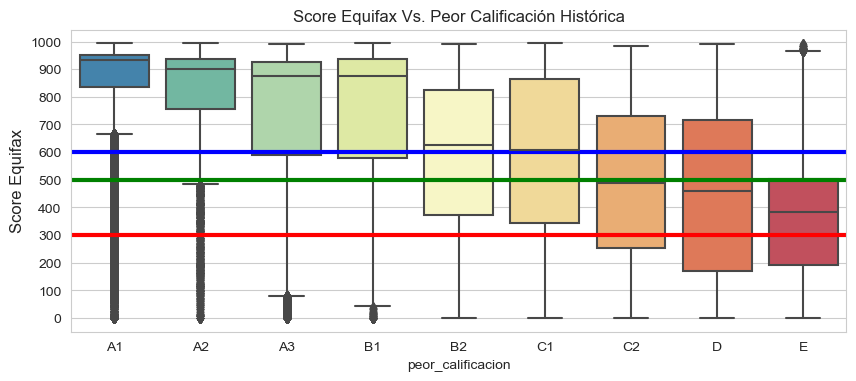

In [302]:
#df_cliente_M = df_cliente.loc[(df_cliente['tipo'] == 'MICRO') & (df_cliente['porcentaje_cancelacion'] >= 0.50), :]

data= df_cliente
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,4), dpi=100)
sns.boxplot(x = 'peor_calificacion', y ='score', data = df_cliente, order = ['A1','A2','A3','B1','B2','C1','C2','D','E'], palette = 'Spectral_r' )
plt.title('Score Equifax Vs. Peor Calificación Histórica')
axes.set_yticks([0,100,200,300,400,500,600,700,800,900,1000])
axes.set_ylabel('Score Equifax', fontsize=12)
plt.axhline(301, color = "red", lw = 3)
plt.axhline(599, color = "blue", lw = 3)
plt.axhline(499, color = "green", lw = 3)
plt.show()

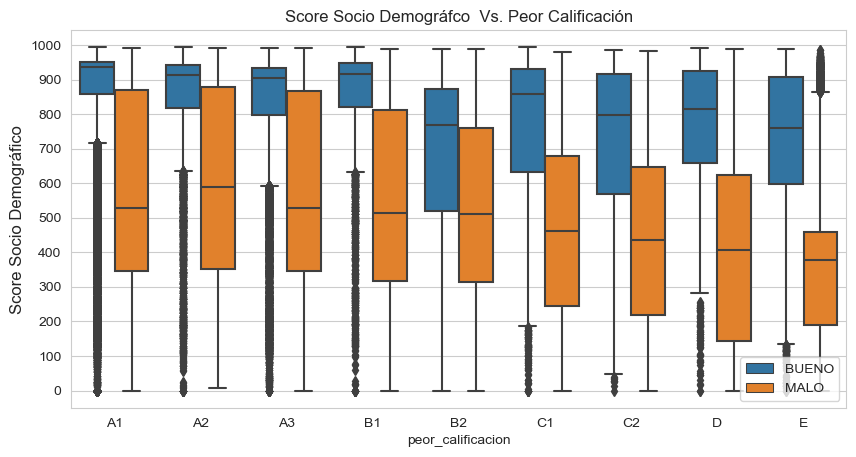

In [303]:
#https://colorbrewer2.org/#type=sequential&scheme=Blues&n=9
#sns.color_palette("Set1", as_cmap=True)
#, hue = "Micro_60", hue_order =['BUENO', 'MALO'],
#palette = {"BUENO":"#2171b5","MALO ":"#d7301f"}
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,5), dpi=100)
sns.boxplot(x = 'peor_calificacion', y ='score', data = df_cliente, hue='Micro_60',hue_order =['BUENO','MALO' ],order = ['A1','A2','A3','B1','B2','C1','C2','D','E'])
plt.title('Score Socio Demográfco  Vs. Peor Calificación')
axes.set_yticks([0,100,200,300,400,500,600,700,800,900,1000])
#plt.axhline(500, linewidth=2, color='r')
axes.set_ylabel('Score Socio Demográfico', fontsize=12)
plt.legend(borderaxespad=1,title='Target')
axes.legend(loc=4)
plt.show()

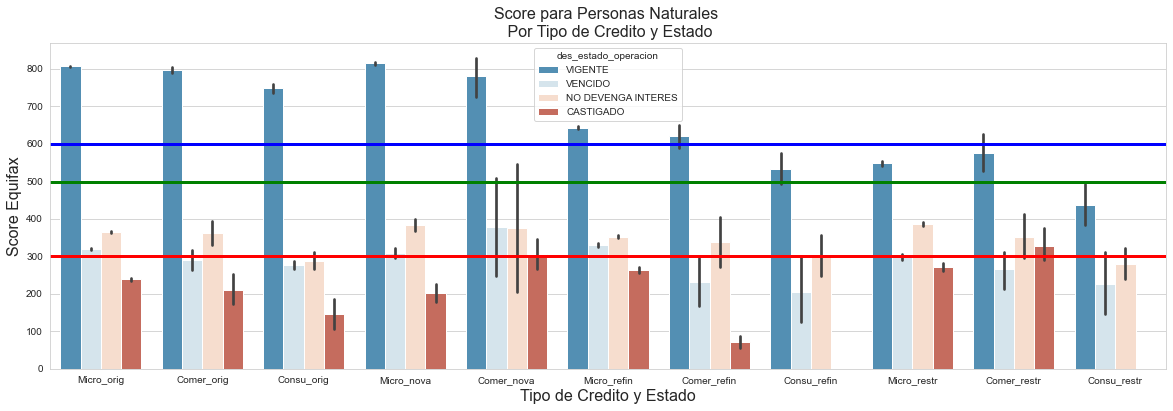

In [304]:
#data= df_mora.loc[ (df_mora['cartera']=='C')  ]
import ptitprince as pt
palette = sns.blend_palette(['blue', 'red'], 4)
fig =  plt.figure(figsize=(20,6)) 
sns.barplot(x='tipo_cre', y='score',  data=df_cliente_n,  hue = 'des_estado_operacion', hue_order = ['VIGENTE', 'VENCIDO','NO DEVENGA INTERES','CASTIGADO'], order = ['Micro_orig', 'Comer_orig',  'Consu_orig', 'Micro_nova', 'Comer_nova','Micro_refin', 'Comer_refin', 'Consu_refin','Micro_restr',   'Comer_restr', 'Consu_restr'] , palette ='RdBu_r' )
plt.title("Score para Personas Naturales \n Por Tipo de Credito y Estado",fontsize = 16)
plt.xlabel('Tipo de Credito y Estado',fontsize = 16)
plt.ylabel('Score Equifax',fontsize = 16)
plt.axhline(301, color = "red", lw = 3)
plt.axhline(599, color = "blue", lw = 3)
plt.axhline(499, color = "green", lw = 3)
plt.show()

In [363]:
brew_palette = sns.choose_colorbrewer_palette('diverging')

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

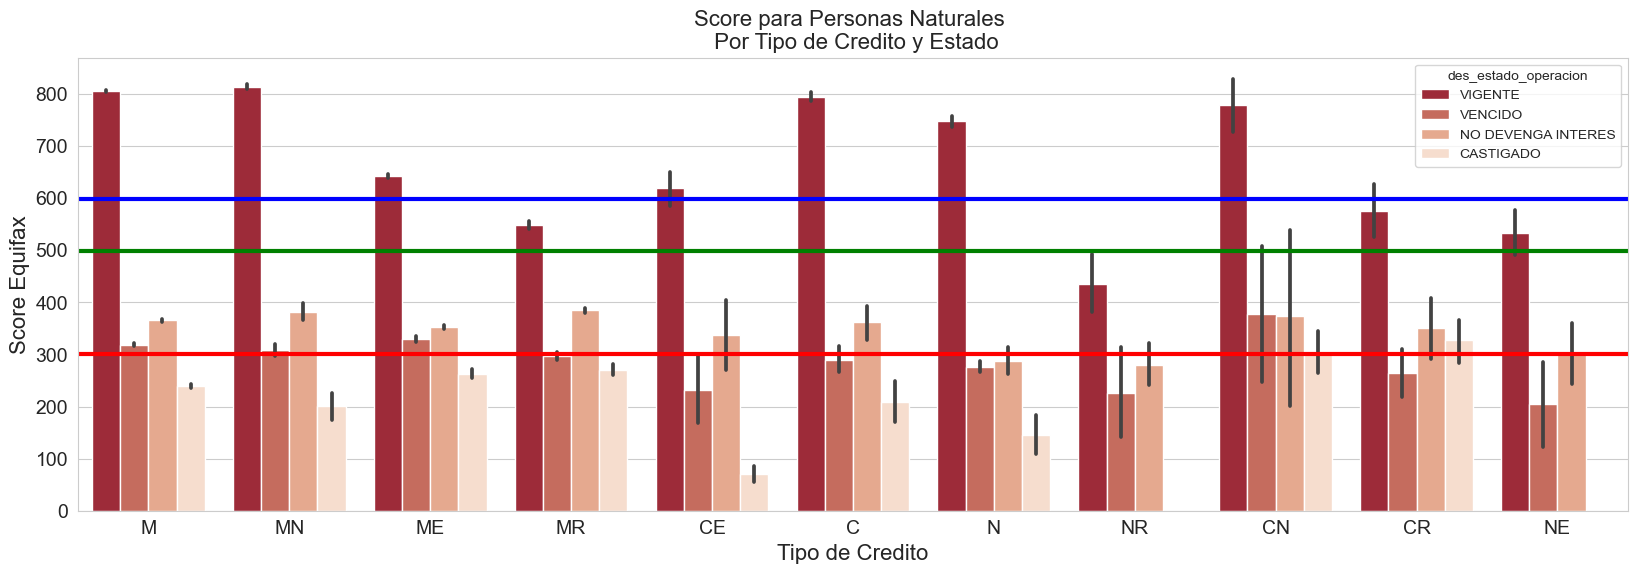

In [306]:
fig=  plt.figure(figsize=(20,6), dpi=100) 
sns.barplot(x='tipo_credito', y='score',  data=df_cliente_n,  hue = 'des_estado_operacion', hue_order = ['VIGENTE', 'VENCIDO','NO DEVENGA INTERES','CASTIGADO'],  palette=brew_palette[:4])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Score para Personas Naturales \n Por Tipo de Credito y Estado",fontsize = 16)
plt.axhline(301, color = "red", lw = 3)
plt.axhline(599, color = "blue", lw = 3)
plt.axhline(499, color = "green", lw = 3)
plt.xlabel('Tipo de Credito',fontsize = 16)
plt.ylabel('Score Equifax',fontsize = 16)
plt.show()

In [307]:
t_c = (df_cliente["tipo_cre"].value_counts())
t_c

t_c_list = t_c.index.tolist()
t_c_list

['Micro_orig',
 'Micro_refin',
 'Micro_restr',
 'Micro_nova',
 'Comer_orig',
 'Consu_orig',
 'Comer_refin',
 'Comer_restr',
 'Consu_refin',
 'Consu_restr',
 'Comer_nova']

### Micro

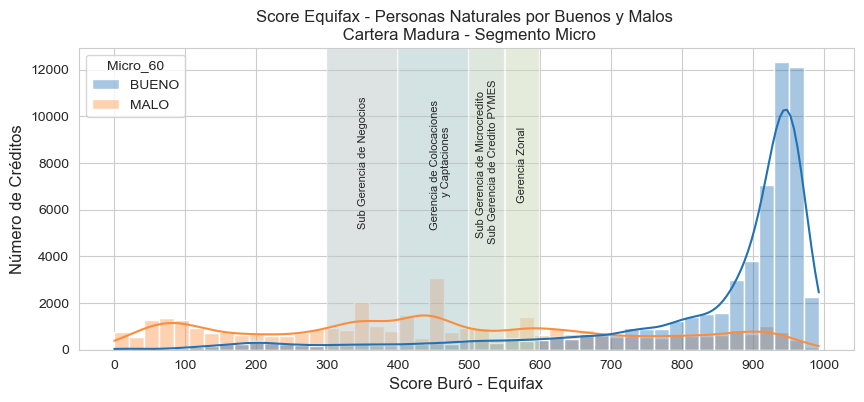

In [336]:
df_cliente_M = df_cliente.loc[(df_cliente['tipo'] == 'MICRO') & (df_cliente['porcentaje_cancelacion'] >= 0.50), :]
#order = ['A1','A2','A3','B1','B2','C1','C2','D','E']
palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
fig, ax =plt.subplots(figsize=(10,4), dpi=100)
sns.histplot(data = df_cliente_M,x = 'score',alpha = .4,hue = 'Micro_60', kde=True , palette = palette)
label=('Score Equifax')
ax.set_xlabel('Score Buró - Equifax', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
ax.set_title('Score Equifax - Personas Naturales por Buenos y Malos \n Cartera Madura - Segmento Micro', fontsize=12)
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
ax.axvspan(300, 399, facecolor='#bac8c7', alpha=0.5)
ax.axvspan(400, 499, facecolor='#a9c6c9', alpha=0.5)
ax.axvspan(500, 550, facecolor='#bdd1bc', alpha=0.5)
ax.axvspan(551, 599, facecolor='#ccd9b9', alpha=0.5)
ax.text(350, 8000, "Sub Gerencia de Negocios", ha="center", va="center", rotation=90, size=8)
ax.text(460, 8000, "Gerencia de Colocaciones \n y Captaciones", ha="center", va="center", rotation=90, size=8)
ax.text(525, 8000, "Sub Gerencia de Microcredito \n Sub Gerencia de Credito PYMES", ha="center", va="center", rotation=90, size=8)
ax.text(575, 8000, "Gerencia Zonal ", ha="center", va="center", rotation=90, size=8)
plt.show()

In [216]:
df_cliente_M_2 = df_cliente_M.loc[:, ['score', 'tipo_cre']]
df_cliente_M_2.groupby('tipo_cre').describe().T

tipo_cre      Micro_nova    Micro_orig  Micro_refin  Micro_restr
score count  6124.000000  80935.000000  8855.000000  2743.000000
      mean    747.614141    697.704516   581.625522   454.737149
      std     267.076569    290.578962   286.753547   278.733303
      min       0.000000      0.000000     0.000000     0.000000
      25%     595.000000    453.000000   352.000000   223.000000
      50%     889.000000    842.000000   610.000000   444.000000
      75%     947.000000    941.000000   863.000000   675.500000
      max     993.000000    993.000000   992.000000   990.000000

Text(0.5, 0, 'Score Equifax')

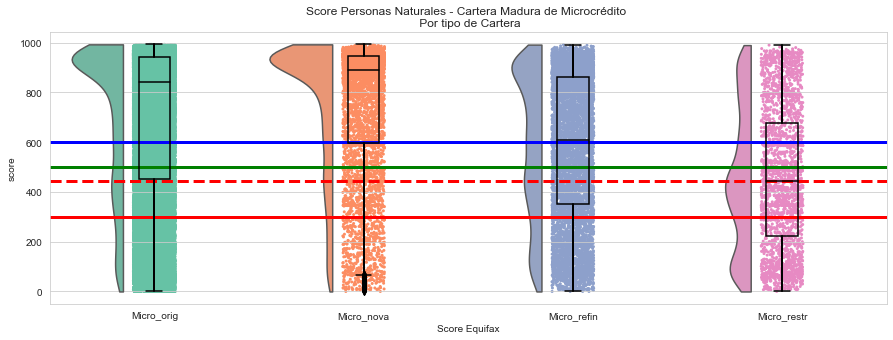

In [217]:
import ptitprince as pt
#adding color
pal = "Set2"
dy=df_cliente_M["score"]; dx=df_cliente_M["tipo_cre"]; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(15, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df_cliente_M, palette = pal, bw = .2, cut = 0., scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df_cliente_M, palette = pal, edgecolor = "white", size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df_cliente_M, color = "black", width = .15, order = ['Micro_orig', 'Micro_nova', 'Micro_refin','Micro_restr'],  zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.axhline(301, color = "red", lw = 3)
#plt.axhline(380, color = "orange", lw = 3, linestyle ="--")
plt.axhline(599, color = "blue", lw = 3)
plt.axhline(499, color = "green", lw = 3)
plt.axhline(444, color = "r", lw = 3,  linestyle='--')
plt.title("Score Personas Naturales - Cartera Madura de Microcrédito \n Por tipo de Cartera")
plt.xlabel('Score Equifax')
#if savefigs:
#plt.savefig('../figs/tutorial_python/figureP06.png', bbox_inches='tight')

In [218]:
df_cliente_M_3 = df_cliente_M.loc[:, ['score', 'des_estado_operacion']]
df_cliente_M_3.groupby('des_estado_operacion').describe().T

des_estado_operacion    CASTIGADO  NO DEVENGA INTERES       VENCIDO  \
score count           1926.000000         5378.000000  12430.000000   
      mean             224.697300          376.438639    319.937731   
      std              137.665924          194.620379    189.085336   
      min                0.000000            0.000000      0.000000   
      25%               70.000000          201.000000    120.000000   
      50%              280.500000          414.500000    348.000000   
      75%              346.000000          524.750000    444.000000   
      max              602.000000          952.000000    926.000000   

des_estado_operacion       VIGENTE  
score count           78923.000000  
      mean              773.040330  
      std               241.837519  
      min                 0.000000  
      25%               669.000000  
      50%               892.000000  
      75%               945.000000  
      max               993.000000

Text(0.5, 1.0, 'Score de la Cartera Madura Micro \n Por Estado de la Operación')

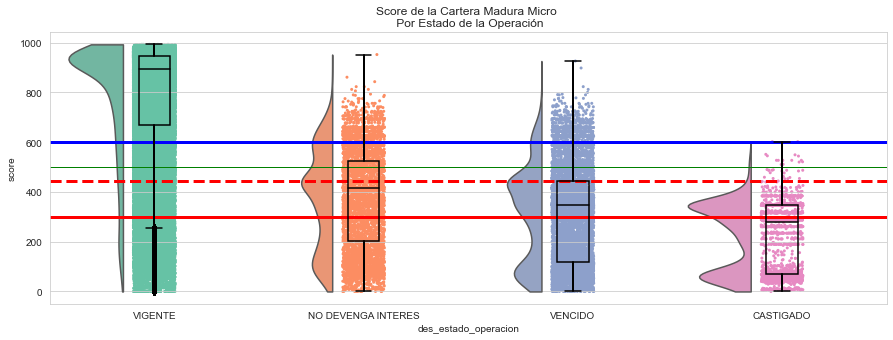

In [204]:
#adding color
pal = "Set2"
dy="score"; dx="des_estado_operacion"; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(15, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df_cliente_M, palette = pal, bw = .2, cut = 0., scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df_cliente_M, palette = pal, edgecolor = "white", size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df_cliente_M, color = "black", width = .15, order = ['VIGENTE', 'NO DEVENGA INTERES', 'VENCIDO','CASTIGADO'] ,zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.axhline(301, color = "red", lw = 3)
plt.axhline(599, color = "blue", lw = 3)
plt.axhline(499, color = "green", lw = 1)
plt.axhline(444, color = "r", lw = 3,  linestyle='--')
plt.title("Score de la Cartera Madura Micro \n Por Estado de la Operación")
#if savefigs:
#plt.savefig('../figs/tutorial_python/figureP06.png', bbox_inches='tight')

In [234]:
def rangos_cambio(row):
    if row['score'] <=512:
        return '<=512'
    elif (row['score'] >=  512) & (row['score'] <= 680):
        return '512 - 680'
    elif (row['score'] >  680) :
        return '>680'
    else:
        return 'na'
df_cliente['rangos_cambio'] = df_cliente.apply(rangos_cambio, axis=1)

In [235]:
score_list = [ 'na', '<=512',  '512_680', '>680']
a = df_cliente.groupby(['rangos_cambio']).agg({'ente':'count','nro_tramite':'count','cedula':'count'})
#a['%_nro_tramite'] = df_cliente.groupby(['rangos_aprobacion'])['monto_aprobado'].transform(lambda x: x/x.sum())
a.reindex(score_list)

,ente,nro_tramite,cedula
rangos_cambio,,,
na,4450.0,4450.0,4450.0
<=512,87264.0,87264.0,87264.0
512_680,NaN,NaN,NaN
>680,147465.0,147465.0,147465.0


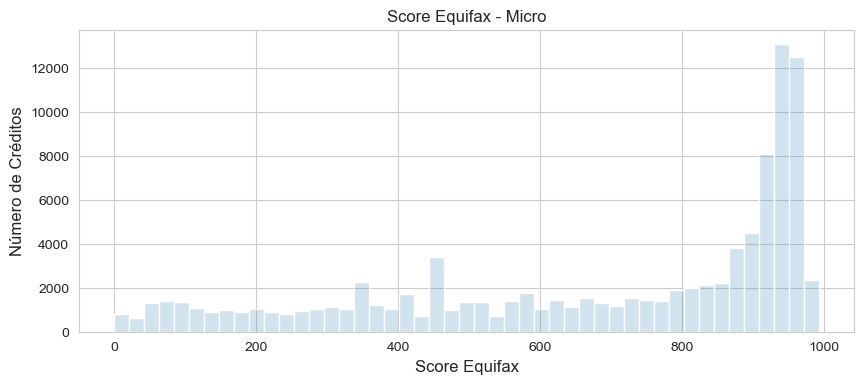

In [325]:
fig, ax =plt.subplots(figsize=(10,4), dpi=100)
sns.histplot(data = df_cliente_M,x = 'score',alpha = .2 )
ax.set_title('Score Equifax - Micro', fontsize=12)
ax.set_xlabel('Score Equifax', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
#ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.show()

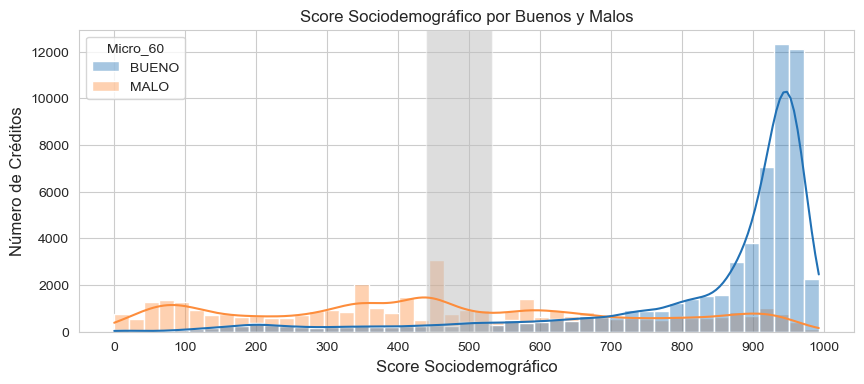

In [350]:
fig, ax =plt.subplots(figsize=(10,4), dpi=100)
palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
sns.histplot(data = df_cliente_M, x = 'score',alpha = .4,hue = 'Micro_60',kde=True ,  palette = palette)
label=('Score Socio Demografico - (IRB)')
ax.set_xlabel('Score Sociodemográfico', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
ax.set_title('Score Sociodemográfico por Buenos y Malos', fontsize=12)
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
#plt.legend(loc='upper left')
#ax.axvspan(381, 523, facecolor='#d4b9da', alpha=0.5)
ax.axvspan(440, 533, facecolor='#bdbdbd', alpha=0.5)
plt.show()

### Comercial 

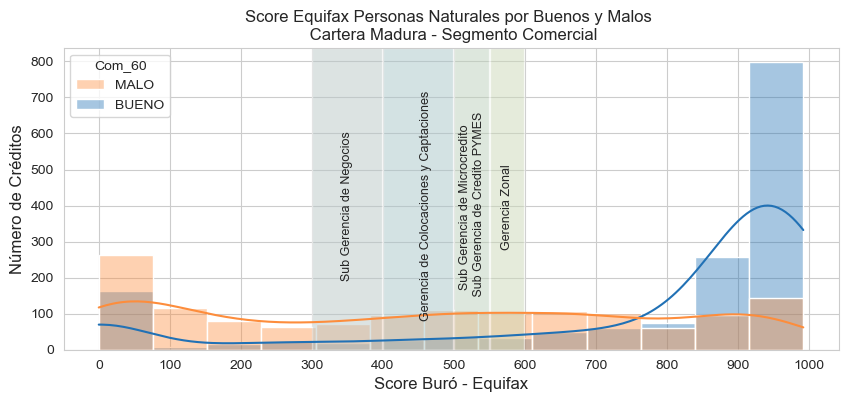

In [308]:
df_cliente_Comer = df_cliente.loc[(df_cliente['tipo'] == 'COMER') & (df_cliente['porcentaje_cancelacion'] >= 0.50), :]
#order = ['A1','A2','A3','B1','B2','C1','C2','D','E']
palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
fig, ax =plt.subplots(figsize=(10,4), dpi=100)
sns.histplot(data = df_cliente_Comer,x = 'score',alpha = .4,hue = 'Com_60', kde=True , palette = palette)
label=('Score Equifax')
ax.set_xlabel('Score Buró - Equifax', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
ax.set_title('Score Equifax Personas Naturales por Buenos y Malos \n Cartera Madura - Segmento Comercial', fontsize=12)
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
ax.axvspan(300, 399, facecolor='#bac8c7', alpha=0.5)
ax.axvspan(400, 499, facecolor='#a9c6c9', alpha=0.5)
ax.axvspan(500, 550, facecolor='#bdd1bc', alpha=0.5)
ax.axvspan(551, 599, facecolor='#ccd9b9', alpha=0.5)
ax.text(350, 400, "Sub Gerencia de Negocios", ha="center", va="center", rotation=90, size=9)
ax.text(460, 400, "Gerencia de Colocaciones y Captaciones", ha="center", va="center", rotation=90, size=9)
ax.text(525, 400, "Sub Gerencia de Microcredito \n Sub Gerencia de Credito PYMES", ha="center", va="center", rotation=90, size=9)
ax.text(575, 400, "Gerencia Zonal ", ha="center", va="center", rotation=90, size=9)
plt.show()

In [309]:
df_cliente_Comer_2 = df_cliente_Comer.loc[:, ['score', 'tipo_cre']]
df_cliente_Comer_2.groupby('tipo_cre').describe().T

tipo_cre     Comer_nova   Comer_orig  Comer_refin  Comer_restr
score count   84.000000  2600.000000    99.000000   185.000000
      mean   652.785714   631.676538   455.131313   461.951351
      std    313.783636   354.718784   334.991278   311.137522
      min      0.000000     0.000000     0.000000     0.000000
      25%    458.000000   341.750000   133.000000   156.000000
      50%    748.000000   784.000000   481.000000   458.000000
      75%    920.250000   941.000000   742.000000   679.000000
      max    991.000000   992.000000   975.000000   992.000000

Text(0.5, 0, 'Score Equifax')

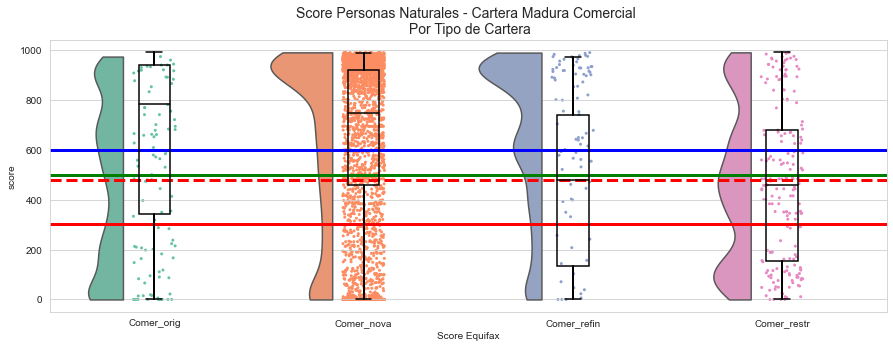

In [310]:
import ptitprince as pt
#adding color
pal = "Set2"
dy=df_cliente_Comer["score"]; dx=df_cliente_Comer["tipo_cre"]; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(15, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df_cliente_Comer, palette = pal, bw = .2, cut = 0., scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df_cliente_Comer, palette = pal, edgecolor = "white", size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df_cliente_Comer, color = "black", width = .15, order = ['Comer_orig', 'Comer_nova', 'Comer_refin','Comer_restr'],  zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.axhline(301, color = "red", lw = 3)
plt.axhline(599, color = "blue", lw = 3)
plt.axhline(499, color = "green", lw = 3)
plt.axhline(481, color = "r", lw = 3,  linestyle='--')
plt.title("Score Personas Naturales - Cartera Madura Comercial \n Por Tipo de Cartera",  fontsize=14)
plt.xlabel('Score Equifax')
#if savefigs:
#plt.savefig('../figs/tutorial_python/figureP06.png', bbox_inches='tight')

In [311]:
df_cliente_Comer_3 = df_cliente_Comer.loc[:, ['score', 'des_estado_operacion']]
df_cliente_Comer_3.groupby('des_estado_operacion').describe().T

des_estado_operacion   CASTIGADO  NO DEVENGA INTERES     VENCIDO      VIGENTE
score count            78.000000          160.000000  393.000000  2337.000000
      mean            260.500000          386.575000  264.160305   702.492940
      std             193.731824          246.014407  239.505970   328.638241
      min               0.000000            0.000000    0.000000     0.000000
      25%              62.750000          127.000000   45.000000   527.000000
      50%             304.500000          420.500000  190.000000   875.000000
      75%             384.000000          603.250000  484.000000   951.000000
      max             657.000000          793.000000  756.000000   992.000000

Text(0.5, 1.0, 'Score de la Cartera Madura Comercial \n Por Estado de la Operación')

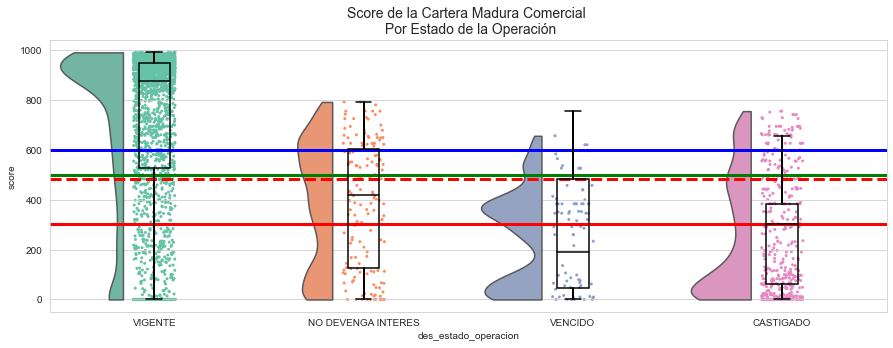

In [355]:
pal = "Set2"
dy="score"; dx="des_estado_operacion"; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(15, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df_cliente_Comer, palette = pal, bw = .2, cut = 0., scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df_cliente_Comer, palette = pal, edgecolor = "white", size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df_cliente_Comer, color = "black", width = .15, order = ['VIGENTE', 'NO DEVENGA INTERES', 'VENCIDO','CASTIGADO'] ,zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.axhline(301, color = "red", lw = 3)
plt.axhline(599, color = "blue", lw = 3)
plt.axhline(499, color = "green", lw = 3)
plt.axhline(484, color = "r", lw = 3,  linestyle='--')
plt.title("Score de la Cartera Madura Comercial \n Por Estado de la Operación" , fontsize=14)
#if savefigs:
#plt.savefig('../figs/tutorial_python/figureP06.png', bbox_inches='tight')

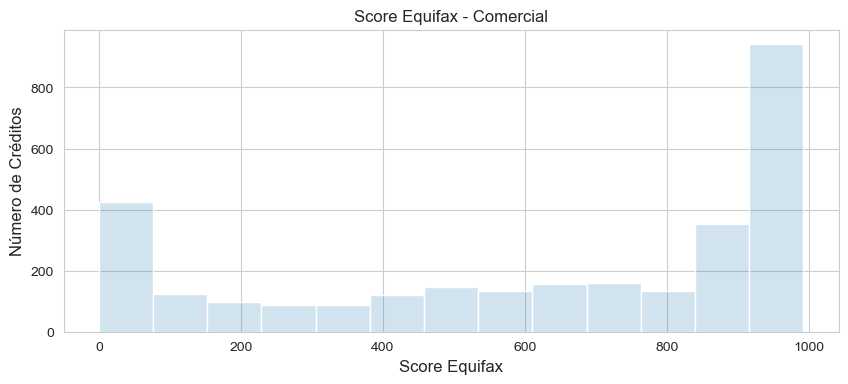

In [313]:
fig, ax =plt.subplots(figsize=(10,4), dpi=100)
sns.histplot(data = df_cliente_Comer,x = 'score',alpha = .2 )
ax.set_title('Score Equifax - Comercial', fontsize=12)
ax.set_xlabel('Score Equifax', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
#ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.show()

In [314]:
#df_cliente.rename(columns = {'Micro_60_predecidos':'Micro_60'}, inplace = True)
#df_cliente.head(2)

In [315]:
df_cliente['Com_60'].unique()

array([nan, 'BUENO', 'MALO'], dtype=object)

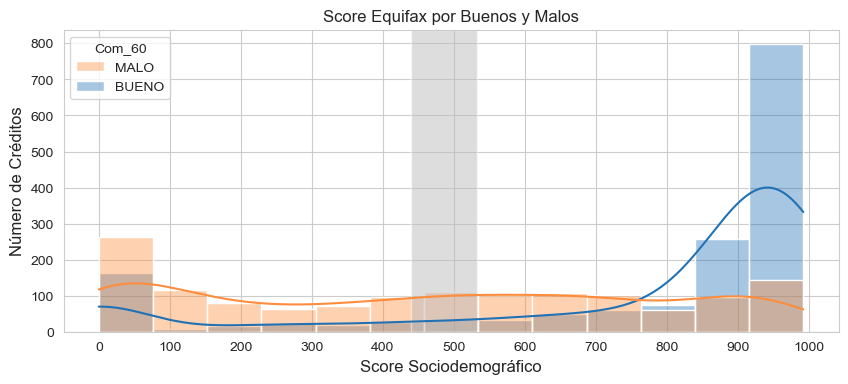

In [359]:
fig, ax =plt.subplots(figsize=(10,4), dpi=100)
palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
sns.histplot(data = df_cliente_Comer, x = 'score',alpha = .4,hue = 'Com_60',kde=True ,  palette = palette)
label=('Score Socio Demografico - (IRB)')
ax.set_xlabel('Score Sociodemográfico', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
ax.set_title('Score Equifax por Buenos y Malos', fontsize=12)
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
#plt.legend(loc='upper left')
#ax.axvspan(381, 523, facecolor='#d4b9da', alpha=0.5)
ax.axvspan(440, 533, facecolor='#bdbdbd', alpha=0.5)
plt.show()

### Consumo

In [227]:
df_cliente_Consu = df_cliente.loc[(df_cliente['tipo'] == 'CONSU') & (df_cliente['porcentaje_cancelacion'] >= 0.50), :]
df_cliente_Consu_2 = df_cliente_Consu.loc[:, ['score', 'tipo_cre']]
df_cliente_Consu_2.groupby('tipo_cre').describe().T

tipo_cre      Consu_orig  Consu_refin  Consu_restr
score count  1530.000000   155.000000    77.000000
      mean    500.014379   512.432258   377.792208
      std     320.908891   292.183184   273.250817
      min       4.000000     9.000000     9.000000
      25%     203.000000   258.500000   119.000000
      50%     447.000000   534.000000   302.000000
      75%     833.000000   765.000000   624.000000
      max     987.000000   971.000000   938.000000

Text(0.5, 0, 'Score Equifax')

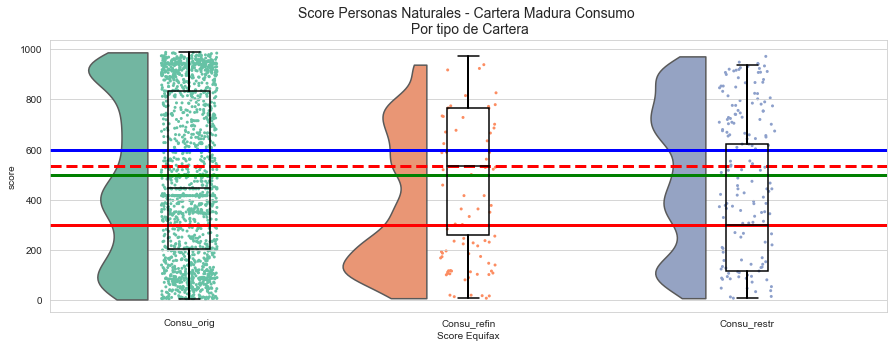

In [228]:
import ptitprince as pt
#adding color
pal = "Set2"
dy=df_cliente_Consu["score"]; dx=df_cliente_Consu["tipo_cre"]; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(15, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df_cliente_Consu, palette = pal, bw = .2, cut = 0., scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df_cliente_Consu, palette = pal, edgecolor = "white", size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df_cliente_Consu, color = "black", width = .15, order = ['Consu_orig', 'Consu_refin','Consu_restr'], zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.axhline(301, color = "red", lw = 3)
plt.axhline(599, color = "blue", lw = 3)
plt.axhline(499, color = "green", lw = 3)
plt.axhline(534, color = "r", lw = 3,  linestyle='--')
plt.title("Score Personas Naturales - Cartera Madura Consumo \n Por tipo de Cartera",  fontsize=14)
plt.xlabel('Score Equifax')
#if savefigs:
#plt.savefig('../figs/tutorial_python/figureP06.png', bbox_inches='tight')

In [221]:
df_cliente_Consu_3 = df_cliente_Consu.loc[:, ['score', 'des_estado_operacion']]
df_cliente_Consu_3.groupby('des_estado_operacion').describe().T

des_estado_operacion  CASTIGADO  NO DEVENGA INTERES     VENCIDO     VIGENTE
score count            27.00000          131.000000  620.000000  984.000000
      mean            143.37037          288.198473  272.811290  673.547764
      std             146.12696          205.574932  192.317971  280.900492
      min               6.00000           13.000000    4.000000    9.000000
      25%              38.00000          108.000000   87.000000  465.250000
      50%              76.00000          236.000000  277.000000  771.500000
      75%             277.50000          423.500000  417.000000  917.000000
      max             442.00000          954.000000  805.000000  987.000000

Text(0.5, 1.0, 'Score de la Cartera Madura Consumo \n Por Estado de la Operación')

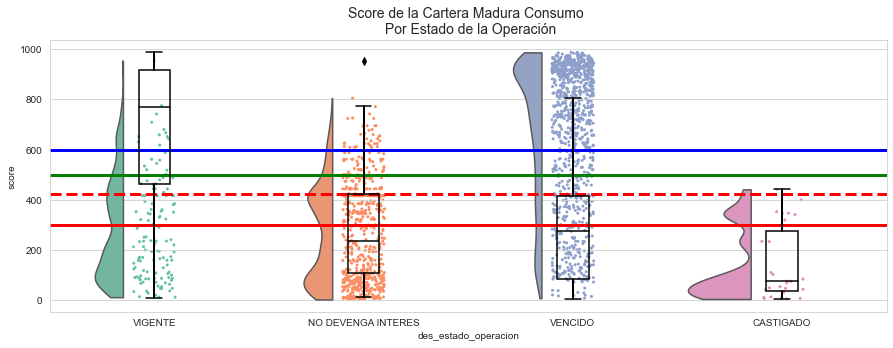

In [356]:
pal = "Set2"
dy="score"; dx="des_estado_operacion"; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(15, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df_cliente_Consu, palette = pal, bw = .2, cut = 0., scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df_cliente_Consu, palette = pal, edgecolor = "white", size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df_cliente_Consu, color = "black", width = .15, order = ['VIGENTE', 'NO DEVENGA INTERES', 'VENCIDO','CASTIGADO'] ,zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.axhline(301, color = "red", lw = 3)
plt.axhline(599, color = "blue", lw = 3)
plt.axhline(499, color = "green", lw = 3)
plt.axhline(423, color = "r", lw = 3,  linestyle='--')
plt.title("Score de la Cartera Madura Consumo \n Por Estado de la Operación" , fontsize=14)
#if savefigs:
#plt.savefig('../figs/tutorial_python/figureP06.png', bbox_inches='tight')

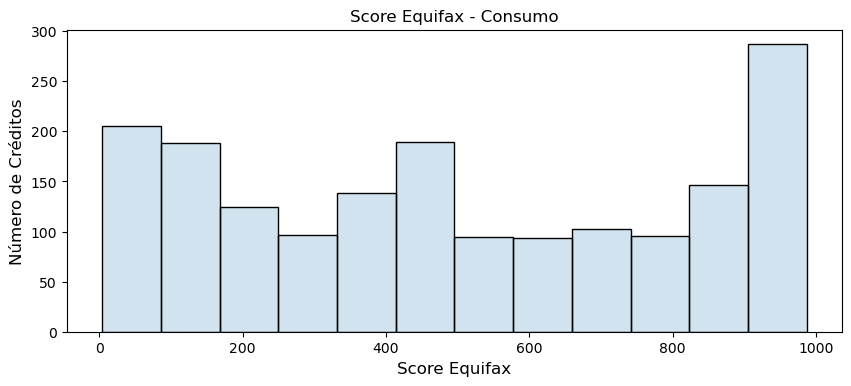

In [56]:
fig, ax =plt.subplots(figsize=(10,4), dpi=100)
sns.histplot(data = df_cliente_Consu,x = 'score',alpha = .2 )
ax.set_title('Score Equifax - Consumo', fontsize=12)
ax.set_xlabel('Score Equifax', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
#ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.show()

In [66]:
df_cliente['Consumo_30'].unique()

array([nan, 'BUENO', 'MALO'], dtype=object)

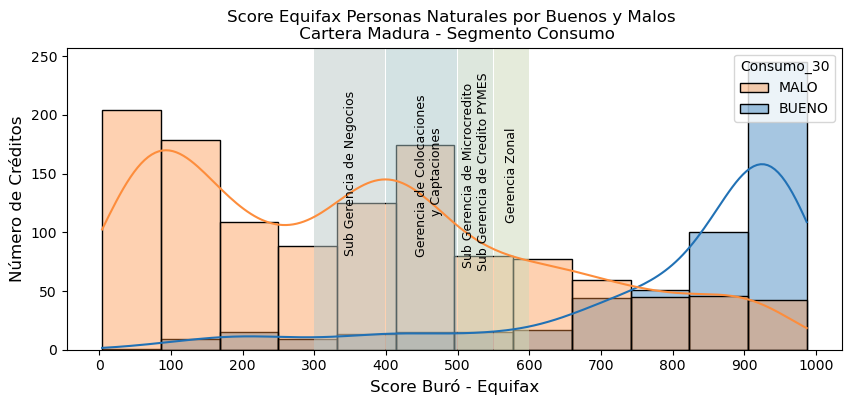

In [65]:
#order = ['A1','A2','A3','B1','B2','C1','C2','D','E']
palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
fig, ax =plt.subplots(figsize=(10,4), dpi=100)
sns.histplot(data = df_cliente_Consu,x = 'score',alpha = .4,hue = 'Consumo_30', kde=True , palette = palette)
label=('Score Equifax')
ax.set_xlabel('Score Buró - Equifax', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
ax.set_title('Score Equifax Personas Naturales por Buenos y Malos \n Cartera Madura - Segmento Consumo', fontsize=12)
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
ax.axvspan(300, 399, facecolor='#bac8c7', alpha=0.5)
ax.axvspan(400, 499, facecolor='#a9c6c9', alpha=0.5)
ax.axvspan(500, 550, facecolor='#bdd1bc', alpha=0.5)
ax.axvspan(551, 599, facecolor='#ccd9b9', alpha=0.5)
ax.text(350, 150, "Sub Gerencia de Negocios", ha="center", va="center", rotation=90, size=9)
ax.text(460, 150, "Gerencia de Colocaciones \n y Captaciones", ha="center", va="center", rotation=90, size=9)
ax.text(525, 150, "Sub Gerencia de Microcredito \n Sub Gerencia de Credito PYMES", ha="center", va="center", rotation=90, size=9)
ax.text(575, 150, "Gerencia Zonal ", ha="center", va="center", rotation=90, size=9)
plt.show()

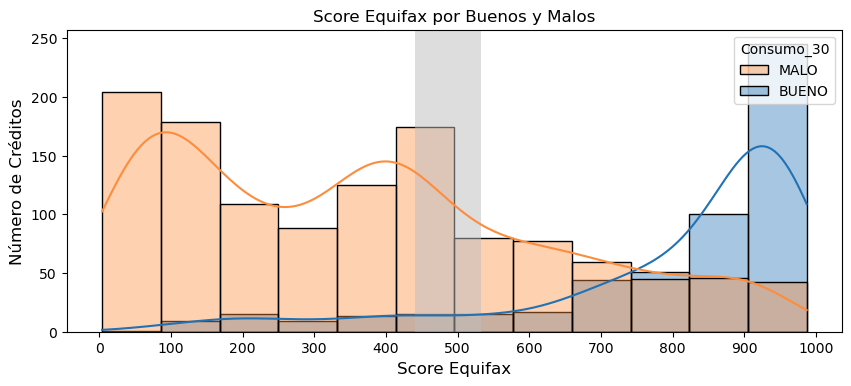

In [69]:
fig, ax =plt.subplots(figsize=(10,4), dpi=100)
palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
sns.histplot(data = df_cliente_Consu, x = 'score',alpha = .4,hue = 'Consumo_30',kde=True ,  palette = palette)
label=('Score Socio Demografico - (IRB)')
ax.set_xlabel('Score Equifax', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
ax.set_title('Score Equifax por Buenos y Malos', fontsize=12)
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
#plt.legend(loc='upper left')
#ax.axvspan(381, 523, facecolor='#d4b9da', alpha=0.5)
ax.axvspan(440, 533, facecolor='#bdbdbd', alpha=0.5)
plt.show()

In [90]:
aaa#df_cliente_M.info(verbose = True)

def Micro_60_pronosticado(row):
    if row['Score_Buenos'] < 540:
        return 'MALO_P'
    elif row['Score_Buenos'] >= 540 :
        return 'BUENO_P'
    else:
        return 'na'

df_cliente['Micro_60_pronosticado'] = df_cliente.apply(Micro_60_pronosticado, axis=1)
pd.crosstab(df_cliente['Micro_60_pronosticado'],df_cliente['Micro_60'], margins=True)

#hue_order =['BUENO', 'MALO'],
#palette = {"BUENO":"#2171b5","MALO ":"#d7301f"}
fig, ax =plt.subplots(figsize=(9,3), dpi=100)
sns.histplot(data = df_cliente_M,x = 'score',alpha = .4,hue = 'Micro_60_predecidos',hue_order =['BUENO', 'MALO'] ,kde=True )
label=('Score Socio Demografico - (IRB)')
ax.set_xlabel('Score Sociodemográfico', fontsize=12)
ax.set_ylabel('Número de Créditos', fontsize=12)
ax.set_title('Score Sociodemográfico por Buenos y Malos Pronosticado', fontsize=12)
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
ax.axvspan(440, 533, facecolor='#d4b9da', alpha=0.5)
plt.show()

#https://colorbrewer2.org/#type=sequential&scheme=Blues&n=9
#sns.color_palette("Set1", as_cmap=True)
#, hue = "Micro_60", hue_order =['BUENO', 'MALO'],
#palette = {"BUENO":"#2171b5","MALO ":"#d7301f"}
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,5), dpi=100)
sns.boxplot(x = 'peor_calificacion', y ='score', data = df_cliente, hue='Micro_60_predecidos',hue_order =['BUENO','MALO' ],order = ['A1','A2','A3','B1','B2','C1','C2','D','E'])
plt.title('Score Socio Demográfco  Vs. Peor Calificación')
axes.set_yticks([0,100,200,300,400,500,600,700,800,900,1000])
#plt.axhline(500, linewidth=2, color='r')
axes.set_ylabel('Score Socio Demográfico', fontsize=12)
plt.legend(borderaxespad=1,title='Target')
axes.legend(loc=4)
plt.show()

#sns.color_palette("Set1", as_cmap=True)
#, hue = "Micro_60", hue_order =['BUENO', 'MALO'],
palette = {"BUENO":"#377eb8","MALO":"#e41a1c"}
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,5), dpi=100)
sns.boxplot(x = 'Micro_60_predecidos', y ='Score_Buenos', data = df_cliente, hue='Micro_60', hue_order =['BUENO','MALO' ],dodge=True,  palette=palette)
plt.title('Score Socio Demográfco  Vs. Predicciones')
#axes.set_yticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.axhline(500, linewidth=2, color='g', ls='--')
axes.set_ylabel('Score Socio Demográfico', fontsize=12)
plt.legend()
plt.show()

palette = {"BUENO":"#377eb8","MALO":"#e41a1c"}
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,5), dpi=100)
sns.boxplot(x = 'Micro_60', y ='score', data = df_cliente, hue='Micro_60_predecidos', hue_order =['BUENO','MALO', ],dodge=True,  palette=palette)
plt.title('Score Socio Demográfco  Vs. Predicciones')
#axes.set_yticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.axhline(500, linewidth=2, color='g', ls='--')
axes.set_ylabel('Score Socio Demográfico', fontsize=12)
plt.legend()
plt.show()

palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
sns.catplot(x="Micro_60_predecidos", y="score",hue="Micro_60", col="des_estado_civil",data=df_cliente, kind="box",height=5,aspect=.8, palette=palette )

In [74]:
#df_cliente.groupby('Micro_60').describe().reset_index().pivot(index='Micro_60', values='Score_Buenos',, columns='level_1')
df_cliente.groupby('Consumo_30')['score'].describe().T

Consumo_30,BUENO,MALO
count,32247.000000,2497.000000
mean,807.276119,338.265519
std,199.876278,239.674321
min,0.000000,4.000000
25%,758.000000,113.000000
50%,884.000000,344.000000
75%,940.000000,474.000000
max,993.000000,971.000000


palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
sns.catplot(x="Micro_60_predecidos", y="


palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
sns.catplot(x="Micro_60_predecidos", y="score",hue="Micro_60", col="des_sector",data=df_cliente, kind="box",height=5,aspect=.8, palette=palette )

palette = {"BUENO":"#2171b5","MALO":"#fd8d3c", "NUEVO":"#74c476"}
sns.catplot(x="Micro_60_predecidos", y="score",hue="Micro_60", col="des_op_sector_bnf",data=df_cliente, kind="box",height=5,aspect=.8, palette=palette )

## Madurez

In [317]:
#df_cliente['porcentaje_cancelacion'].sort_values(), 
#df_cliente['porcentaje_cancelacion_saldo'].sort_values()
df_cliente_Comer['porcentaje_cancelacion'].describe(),df_cliente_Comer['porcentaje_cancelacion_saldo'].describe()

(count    2968.000000
 mean        0.736051
 std         0.134547
 min         0.500000
 25%         0.620000
 50%         0.750000
 75%         0.850000
 max         0.980000
 Name: porcentaje_cancelacion, dtype: float64,
 count    2968.000000
 mean        0.705954
 std         0.178622
 min         0.000000
 25%         0.580000
 50%         0.720000
 75%         0.850000
 max         0.990000
 Name: porcentaje_cancelacion_saldo, dtype: float64)

In [93]:
#df_cliente[['periodos_plazo','PLAZO_MESES']].describe()

In [376]:
df_cartera_madura = df_cliente.loc[(df_cliente.porcentaje_cancelacion_saldo >= 0.5) ,:]

In [377]:
df_cartera_madura.shape

(93959, 54)

In [318]:
df_cliente_Comer.shape

(2968, 54)

In [319]:
print("Rango Score:")
print("(Min= ",df_cliente_Comer['score'].min(),", Max=",df_cliente_Comer['score'].max(),")")

Rango Score:
(Min=  0.0 , Max= 992.0 )


### Cambiar Cartera 

In [320]:
df_cliente = df_cliente_Comer

In [321]:
df_cliente['Percentile'] = df_cliente['score'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [322]:
df_cliente['score'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      0.0
0.1     11.0
0.2    190.0
0.3    416.1
0.4    589.6
0.5    734.5
0.6    871.2
0.7    922.0
0.8    950.0
0.9    969.0
1.0    992.0
Name: score, dtype: float64

In [323]:
df_cliente['Bucket'] = np.round(df_cliente.score.rank(pct = True), decimals=1)
df_cliente['Bucket'].value_counts()

0.8    306
0.4    298
0.3    297
0.2    297
0.9    296
0.5    296
0.6    295
0.7    293
0.0    275
0.1    169
1.0    146
Name: Bucket, dtype: int64

In [324]:
df_cliente['rango']= pd.qcut(df_cliente['score'], 10)
df_cliente['rango'].value_counts()

(950.0, 969.0]    324
(871.2, 922.0]    303
(-0.001, 11.0]    300
(589.6, 734.5]    297
(734.5, 871.2]    297
(11.0, 190.0]     296
(416.1, 589.6]    296
(190.0, 416.1]    295
(922.0, 950.0]    291
(969.0, 992.0]    269
Name: rango, dtype: int64

In [325]:
#df_cliente['rango_20']= pd.qcut(df_cliente['score'], 20)
#df_cliente['rango_20'].value_counts()

In [326]:
#df_cliente['rango_perfil_8']= pd.qcut(df_cliente['score'], 8)
#df_cliente['rango_perfil_8'].value_counts()

In [327]:
#df_cliente['rango_perfil_9']= pd.qcut(df_cliente['score'], 9)
#df_cliente['rango_perfil_9'].value_counts()

In [328]:
#df_cliente['rango_perfil_20']= pd.qcut(df_cliente['score'], 20)
#df_cliente['rango_perfil_20'].value_counts()

In [329]:
#df_cliente['perfil_9'].quantile([1/9,2/9,3/9,4/9,5/9,6/9,7/9,8/9,9/9])
#df_cliente['score'].describe(percentiles = [1/9,2/9,3/9,4/9,5/9,6/9,7/9,8/9,9/9]).T

### Generaar Dummies para el data frame del segmento

In [331]:
dummy_bm = pd.get_dummies(df_cliente['Com_60'])
print(dummy_bm)

        BUENO  MALO
28          0     1
50          0     1
79          0     1
198         1     0
256         0     1
...       ...   ...
266702      1     0
266710      0     1
266724      1     0
266913      0     1
266962      0     1

[2968 rows x 2 columns]


In [332]:
df_cliente = pd.merge(
    left=df_cliente,
    right=dummy_bm,
    left_index=True,
    right_index=True)

In [333]:
df_cliente.tail(3)

,ente,cedula_ruc,op_operacion,nro_tramite,nro_operacion,cedula,tipo_identificacion,Tipo_Persona,tipo_credito,des_op_sector_bnf,fecha_contabilizacion,des_forma_pago,monto_aprobado,des_estado_operacion,cod_oficina,des_oficina,des_zonal,sld_tot_xven,sld_tot_ven,sld_tot_ndi,plazo_meses,atraso_maximo,atraso_prom,score,score_buro,calificacion_score,calif_fecha_corte,calif_fecha_corte_1,calif_fecha_corte_2,calif_fecha_corte_3,calif_fecha_corte_4,calif_fecha_corte_5,porcentaje_cancelacion,rango_porcentaje_cancelacion,porcentaje_cancelacion_saldo,cl_calif_act,peor_calificacion,cuota_estimada_buro,Micro_60,Micro_30,Com_30,Com_60,Consumo_15,Consumo_30,fecha_corte,anio,mes,AnioMes,sld_improd,sld_total,mora,tipo_cre,tipo,rangos_aprobacion,Percentile,Bucket,rango,BUENO,MALO
266724,1117618,2100400767,2653958,1600429,520037763,2100400767,C,Persona Natural,C,PECUARIO,2015-03-09,ANUAL,20000.00,VIGENTE,52,SUCUA (AG.),ZONAL CUENCA,2857.16,0.00,0.00,84,29.0,8.50,936.0,NaN,A1,A1,A1,A1,A1,A1,A1,0.85,75-100,0.85,A1,B1,NaN,NaN,NaN,BUENO,BUENO,NaN,NaN,2022-01-31 00:00:00.000,2015-03-09,2015-03-09,2015-03-01,0.00,2857.16,0.0,Comer_orig,COMER,>600,NaN,0.8,"(922.0, 950.0]",1,0
266913,205645,2100430780,1287015,908578,110019652,2100430780,C,Persona Natural,C,AGRICOLA,2012-06-25,ANUAL,23584.15,VIGENTE,11,SHUSHUFINDI (AG.),ZONAL IBARRA,5896.03,0.00,0.00,132,143.0,83.33,360.0,NaN,A1,A1,A1,A1,A1,A1,C1,0.81,75-100,0.75,A1,D,NaN,NaN,NaN,MALO,MALO,NaN,NaN,2022-01-31 00:00:00.000,2012-06-25,2012-06-25,2012-06-01,0.00,5896.03,0.0,Comer_orig,COMER,301_499,NaN,0.3,"(190.0, 416.1]",0,1
266962,456985,2100440235,4203957,2390790,30213036,2100440235,C,Persona Natural,C,COMERCIO,2018-10-05,MENSUAL,20000.00,NO DEVENGA INTERES,3,LAGO AGRIO,ZONAL IBARRA,0.00,1666.68,1110.96,40,119.0,16.43,358.0,NaN,A1,C1,B2,A3,A3,A2,A2,0.87,75-100,0.86,C1,C1,NaN,NaN,NaN,MALO,MALO,NaN,NaN,2022-01-31 00:00:00.000,2018-10-05,2018-10-05,2018-10-01,2777.64,2777.64,1.0,Comer_orig,COMER,301_499,NaN,0.3,"(190.0, 416.1]",0,1


## Año

In [334]:
#df_cliente = df_cliente.loc[(df_cliente['anio'] >= 2019) , :]
df_cliente.shape

(2968, 59)

In [335]:
df_cliente['anio'].unique()

array(['2020-05-11T00:00:00.000000000', '2018-03-20T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', ...,
       '2018-03-19T00:00:00.000000000', '2009-09-21T00:00:00.000000000',
       '2012-06-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [336]:
#df_cliente.groupby(['rango','Micro_60'],as_index = False).count().pivot('rango','Micro_60').fillna(0)

In [337]:
#kstable_1 = pd.DataFrame.pivot_table(df_cliente, values ='CEDULA', index =['Bucket'],columns =['Micro_60'], aggfunc = np.count_nonzero)
#kstable_1

In [338]:
def acu_sum(x):
    LISTA_RPUEBA=list(x)
    vector=[LISTA_RPUEBA[i] if i==0 else LISTA_RPUEBA[i]+LISTA_RPUEBA[i-1]
                       for i in range(0,len(LISTA_RPUEBA))]
    return vector

In [339]:
def decu_sum(x):
    LISTA_RPUEBA=list(x)
    vector=[LISTA_RPUEBA[i] if i==0 else LISTA_RPUEBA[i]-LISTA_RPUEBA[i-1]
                       for i in range(0,len(LISTA_RPUEBA))]
    return vector

### Cambiar Segmento

In [340]:
kstable = pd.DataFrame.pivot_table(df_cliente_Comer, values ='ente', index =['rango'],columns =['Com_60'], aggfunc = np.count_nonzero)
kstable.reset_index(inplace = True)
#kstable.index = range(1,11)
#kstable.index.rename('Decile', inplace=True)
kstable

Com_60,rango,BUENO,MALO
0,"(-0.001, 11.0]",162,138
1,"(11.0, 190.0]",13,283
2,"(190.0, 416.1]",70,225
3,"(416.1, 589.6]",69,227
4,"(589.6, 734.5]",99,198
5,"(734.5, 871.2]",163,134
6,"(871.2, 922.0]",222,81
7,"(922.0, 950.0]",227,64
8,"(950.0, 969.0]",284,40
9,"(969.0, 992.0]",251,18


In [341]:
kstable.insert(0,'DECIL',int,allow_duplicates=False)
kstable['DECIL'] = np.arange(0,10)+1
kstable.insert(2,'TOT_POB',int,allow_duplicates=False)
kstable['TOT_POB'] = (kstable['BUENO'])+(kstable['MALO'])
kstable.insert(3,'DIST_POB',int,allow_duplicates=False)
kstable['DIST_POB'] = np.round((kstable['TOT_POB']/kstable['TOT_POB'].sum()),3)
kstable.insert(4,'DIST_POB_ACUM',int,allow_duplicates=False)
kstable['DIST_POB_ACUM'] = kstable['DIST_POB'].cumsum()
kstable.insert(6,'B_ACUM',int,allow_duplicates=False)
kstable['B_ACUM'] = (kstable['BUENO'].cumsum())
kstable.insert(7,'DIST_B_ACUM',int,allow_duplicates=False)
kstable['DIST_B_ACUM'] =  np.round((kstable['B_ACUM']/kstable['BUENO'].sum()),3)
kstable.insert(8,'TASA_B_ACUM',int,allow_duplicates=False)
kstable['TASA_B_ACUM']=np.round(acu_sum(kstable['DIST_B_ACUM']),3)
kstable.insert(10,'M_ACUM',int,allow_duplicates=False)
kstable['M_ACUM'] = (kstable['MALO'].cumsum())
kstable.insert(11,'DIST_M_ACUM',int,allow_duplicates=False)
kstable['DIST_M_ACUM'] =  np.round((kstable['M_ACUM']/kstable['MALO'].sum()),3)
kstable.insert(12,'TASA_M_ACUM',int,allow_duplicates=False)
kstable['TASA_M_ACUM'] = np.round(decu_sum(kstable['DIST_M_ACUM']),3)
kstable.insert(13,'ODDS',int,allow_duplicates=False)
kstable['ODDS'] = np.round(kstable['BUENO'].divide(kstable['MALO']),decimals=2).apply(np.floor)
kstable.insert(14,'M_B',int,allow_duplicates=False)
kstable['M_B'] = np.round(kstable['MALO'].divide(kstable['BUENO']),3)
kstable.insert(15,'TASA_M',int,allow_duplicates=False)
kstable['TASA_M'] = np.round(kstable['MALO'].divide(kstable['TOT_POB']),3)
kstable.insert(16,'PERDIDA',int,allow_duplicates=False)
kstable['PERDIDA'] = np.round((kstable['DIST_POB_ACUM'])*(kstable['TASA_M']),3)
kstable.insert(17,'PERDIDA_ACUM',int,allow_duplicates=False)
kstable['PERDIDA_ACUM'] = np.round(kstable['PERDIDA'].cumsum(),3)
kstable.insert(18,'GINI',int,allow_duplicates=False)
kstable['GINI'] = np.round((kstable['TASA_B_ACUM'])*(kstable['TASA_M_ACUM']),3)
kstable.insert(19,'KS',int,allow_duplicates=False)
kstable['KS'] = np.round(kstable['DIST_M_ACUM']-kstable['DIST_B_ACUM'],4)
kstable.insert(20,'TPR',int,allow_duplicates=False)
kstable['TPR'] = np.round(1-(kstable['M_ACUM']/kstable['M_ACUM'].max()),3)
kstable.insert(21,'FPR',int,allow_duplicates=False)
kstable['FPR'] = np.round(1-(kstable['B_ACUM']/kstable['B_ACUM'].max()),3)
kstable.insert(22,'AUC',int,allow_duplicates=False)
kstable['AUC'] = np.round((np.abs(kstable['FPR'].diff(+1)))*(kstable['TPR'].rolling(2).mean()),3)

In [342]:
a = (1-kstable['FPR'][0])

In [343]:
TPR_list = kstable['TPR'].values.tolist()
TPR_list.insert(0,1)
TPR_list = pandas.DataFrame(TPR_list,columns=['TPR_list'])

In [344]:
TPR_list_M = TPR_list.rolling(2).mean()
b=TPR_list_M.loc[1,:]

In [345]:
kstable['AUC'][0] = a*b

In [346]:
kstable

Com_60,DECIL,rango,TOT_POB,DIST_POB,DIST_POB_ACUM,BUENO,B_ACUM,DIST_B_ACUM,TASA_B_ACUM,MALO,M_ACUM,DIST_M_ACUM,TASA_M_ACUM,ODDS,M_B,TASA_M,PERDIDA,PERDIDA_ACUM,GINI,KS,TPR,FPR,AUC
0,1,"(-0.001, 11.0]",300,0.101,0.101,162,162,0.104,0.104,138,138,0.098,0.098,1.0,0.852,0.460,0.046,0.046,0.010,-0.006,0.902,0.896,0.098904
1,2,"(11.0, 190.0]",296,0.100,0.201,13,175,0.112,0.216,283,421,0.299,0.201,0.0,21.769,0.956,0.192,0.238,0.043,0.187,0.701,0.888,0.006000
2,3,"(190.0, 416.1]",295,0.099,0.300,70,245,0.157,0.269,225,646,0.459,0.160,0.0,3.214,0.763,0.229,0.467,0.043,0.302,0.541,0.843,0.028000
3,4,"(416.1, 589.6]",296,0.100,0.400,69,314,0.201,0.358,227,873,0.620,0.161,0.0,3.290,0.767,0.307,0.774,0.058,0.419,0.380,0.799,0.020000
4,5,"(589.6, 734.5]",297,0.100,0.500,99,413,0.265,0.466,198,1071,0.761,0.141,0.0,2.000,0.667,0.334,1.108,0.066,0.496,0.239,0.735,0.020000
5,6,"(734.5, 871.2]",297,0.100,0.600,163,576,0.369,0.634,134,1205,0.856,0.095,1.0,0.822,0.451,0.271,1.379,0.060,0.487,0.144,0.631,0.020000
6,7,"(871.2, 922.0]",303,0.102,0.702,222,798,0.512,0.881,81,1286,0.913,0.057,2.0,0.365,0.267,0.187,1.566,0.050,0.401,0.087,0.488,0.017000
7,8,"(922.0, 950.0]",291,0.098,0.800,227,1025,0.657,1.169,64,1350,0.959,0.046,3.0,0.282,0.220,0.176,1.742,0.054,0.302,0.041,0.343,0.009000
8,9,"(950.0, 969.0]",324,0.109,0.909,284,1309,0.839,1.496,40,1390,0.987,0.028,7.0,0.141,0.123,0.112,1.854,0.042,0.148,0.013,0.161,0.005000
9,10,"(969.0, 992.0]",269,0.091,1.000,251,1560,1.000,1.839,18,1408,1.000,0.013,13.0,0.072,0.067,0.067,1.921,0.024,0.000,0.000,0.000,0.001000


In [347]:
kstable.to_clipboard(sep="\t", index=True)

## KPIS

In [348]:
colorama.init()
Gini = (1-kstable.loc[:, 'GINI'].sum())*100
print(Fore.BLUE + "Gini es " + str(1-kstable.loc[:, 'GINI'].sum()) + " " )

Gini es 0.55 


In [349]:
from colorama import Fore
print(Fore.RED + "KS es " + str(max(kstable['KS']))+" "+ "en el decil " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))

KS es 0.496 en el decil 4


In [350]:
AUC = 1-kstable.loc[:, 'AUC'].sum()
print(Fore.GREEN + "AUC es " +str(1-kstable.loc[:, 'AUC'].sum()) + " " )

AUC es 0.775096 


<Figure size 800x400 with 0 Axes>

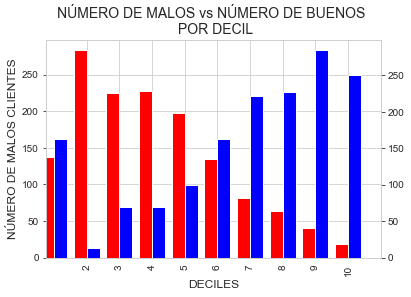

In [351]:
sns.set_style("whitegrid")
df= kstable

fig,  plt.figure(figsize=(8,4), dpi=100)
ax = df.plot(kind ='bar', x="DECIL", y='MALO', legend=False,  color="r", width=0.4, position=1)
ax2 = ax.twinx()
df.plot(kind ='bar',x="DECIL", y='BUENO', ax=ax2, legend=False, color="b", width=0.4, position=0)
#df.plot(kind ='line',x="DECIL", y='M_B', ax=ax2, legend=False, color="r")
#ax.figure.legend()
#plt.plot([1, 10], [1, 10],'r--')
#plt.xlim([0, 1.0])
#plt.ylim([0, 1.0])
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid()
ax.set_xlabel('DECILES', fontsize = 12)
ax.set_ylabel('NÚMERO DE MALOS CLIENTES', fontsize = 12)
ax.set_title('NÚMERO DE MALOS vs NÚMERO DE BUENOS \n POR DECIL', fontsize = 14)
#ax.legend(frameon=False, loc='upper center')
plt.show()

<Figure size 800x400 with 0 Axes>

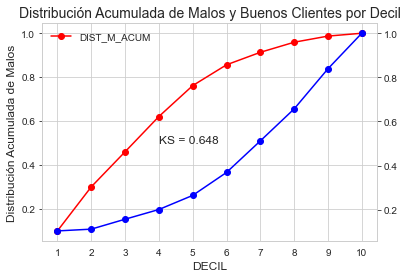

In [352]:
sns.set_style("whitegrid")
df= kstable
fig,  plt.figure(figsize=(8,4), dpi=100)
ax = df.plot(x="DECIL", y='DIST_M_ACUM', legend=False,  color="r", marker='o')
ax2 = ax.twinx()
df.plot(x="DECIL", y='DIST_B_ACUM', ax=ax2, legend=False, color="b", marker='o')
#ax.figure.legend()
#plt.plot([1, 10], [1, 10],'r--')
#plt.xlim([0, 1.0])
#plt.ylim([0, 1.0])
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid()
ax.set_xlabel('DECIL', fontsize = 12)
ax.set_ylabel('Distribución Acumulada de Malos', fontsize = 12)
ax.set_title('Distribución Acumulada de Malos y Buenos Clientes por Decil', fontsize = 14)
ax.legend(frameon=False, loc='upper left', ncol=1)

#y = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#x = [1,2,3,4,5,6,7,8,9,10]
#n = [0,0,0.4450,0,0,0,0,0,0,0]
 
#fig, ax = plt.subplots()
#ax.scatter(x, y)
 
#for i, txt in enumerate(n):
#    ax.annotate(txt, (x[i], y[i]))
    
 
plt.text(4,0.5, 'KS = 0.648', fontsize = 12) 
plt.show()

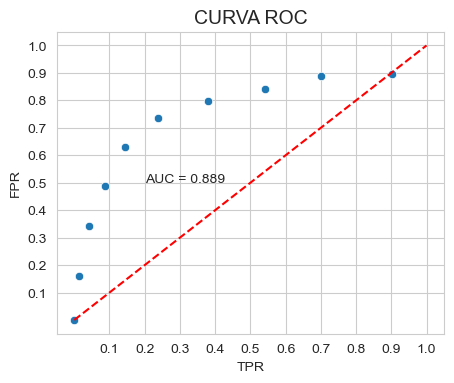

In [353]:
fig, ax =  plt.subplots(figsize=(5,4), dpi=100)
sns.scatterplot(data=kstable, y='FPR', x='TPR')
#sns.scatterplot(data=kstable, x=('DECIL'), y=('DECIL'))
#plt.plot('FPR', 'TPR', label='Logistic Regression (area = %0.2f)' %)
ax.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.plot([0.0, 1], [0.0, 1],'r--')
#plt.legend()
#plt.xlim(0,35000)
plt.title('CURVA ROC', fontsize = 14)
#ax.set_xlabel('TRUE POSITIVE RATE', fontsize = 12)
#ax.set_ylabel('FAKE POSITVE RATE', fontsize = 12)
plt.text(0.2,0.5, 'AUC = 0.889')  
plt.show()

<Figure size 432x288 with 0 Axes>

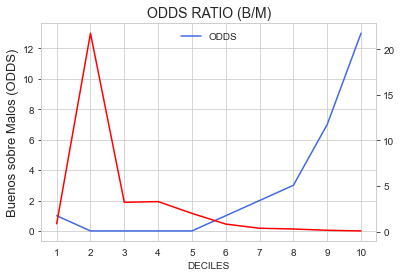

In [354]:
sns.set_style("whitegrid")
df= kstable
fig = plt.figure()
ax = df.plot(kind ='line', x="DECIL", y='ODDS', legend=False,  color="royalblue")
ax2 = ax.twinx()
df.plot(kind ='line',x="DECIL", y='M_B', ax=ax2, legend=False, color="r")
#ax.figure.legend()
#plt.plot([1, 10], [1, 10],'r--')
#plt.xlim([0, 1.0])
#plt.ylim([0, 1.0])
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid()
ax.set_xlabel('DECILES')
ax.set_ylabel('Buenos sobre Malos (ODDS)', fontsize = 13)
ax.set_title('ODDS RATIO (B/M)', fontsize = 14)
ax.legend(frameon=False, loc='upper center', ncol=2)
plt.show()

## EXPORT TABLE 

In [152]:
kstable.to_excel("BKT_equifax.xlsx",sheet_name='KPIS')

# Uno por Ciento

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt
# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
from os import listdir
from os.path import isfile, join
path = r'\\172.16.2.166\Riesgo_Estructural\analistas\Danilo_Criollo\Modelo score micro pn\Base_Generada_Scoring'
os.listdir(path)

In [ ]:
df_cliente = pd.read_csv('Base_Score_Test_31122021.txt', sep='~', header='infer',  encoding = 'ISO-8859-1', error_bad_lines=True, low_memory=False)
#df_cliente = pd.read_excel('Clientes_Ruta_16122021_2.xlsx', sheet_name='Base_Negocios')
df_cliente.head(2)

In [ ]:
df_cliente.shape

In [ ]:
df_cliente.rename(columns = {'trim(base_scoring.Micro_60)':'Micro_60'}, inplace = True)
df_cliente.rename(columns = {'mayorplazovencidohist�ricototal':'mpvht'}, inplace = True)

In [ ]:
df_cliente.info()

In [ ]:
df_cliente['TARGET'] = df_cliente['Micro_60'].map({'BUENO': 0, 'MALO': 1})

In [ ]:
df_cliente = df_cliente.loc[(df_cliente.monto_aprobado <= 5000) & (df_cliente.anio >= 2016), :] 
df_cliente.shape

In [ ]:
df_cliente.groupby('anio').agg({'CEDULA':['count'],'ente':['count']})

In [ ]:
df_cliente.describe(percentiles = [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

In [ ]:
df_c=  pd.DataFrame()
#df_c['anio']=df_cliente['anio'].values
#df_c['ente']=df_cliente['ente'].values
df_c['CEDULA']=df_cliente['CEDULA'].values
df_c['target']=df_cliente['TARGET'].values
df_c['plazo_meses']=df_cliente['PLAZO_MESES'].values
df_c['monto_aprobado']=df_cliente['monto_aprobado'].values
df_c['Score_Buenos']=df_cliente['Score_Buenos'].values
df_c['score_buro']=df_cliente['score_buro'].values

In [ ]:
for column in ['target','plazo_meses', 'monto_aprobado','score_buro']:
    df_c[column].fillna(df_c[column].mode()[0], inplace=True)

In [ ]:
df_c.head(2)

In [ ]:
df_c.describe(percentiles = [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

# Grafico 3D

In [ ]:
## Matplotlib Sample Code using 2D arrays via meshgrid
X = df_c["monto_aprobado"]
Y = df_c["plazo_meses"]
X, Y = np.meshgrid(X, Y)
Z = df_c["score_buro"]
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Cruce uno por Ciento')
plt.show()

In [ ]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(df_c[['plazo_meses','monto_aprobado','score_buro']])
y = np.array(df_c['target'])
X.shape

In [ ]:
## Colors  https://matplotlib.org/3.1.0/gallery/color/named_colors.html
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','blueviolet','pink']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=asignar,s=60)
ax.set_xlabel('Plazo', fontsize = 16)
ax.set_ylabel('Monto', fontsize = 16)
ax.set_zlabel('Score', fontsize = 16)

In [ ]:
Nc = range(1, 25)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
df_c.info()

In [ ]:
modelo_1 = DecisionTreeRegressor(max_depth =3,random_state = 0)
y_train = df_c['target'] 
X_train = df_c.loc[:,['Score_Buenos']]
modelo_1.fit(X_train, y_train)

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
# Predicting the clusters  # 'red','green','yellow', 'blue' , 'lime', 'blueviolet','deeppink', 'orangered', 'tomato', 'olive'
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['green','yellow', 'blueviolet', 'orangered']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
ax.set_xlabel('Plazo', fontsize = 16)
ax.set_ylabel('Monto', fontsize = 16)
ax.set_zlabel('Score', fontsize = 16)

In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

y = df_c["plazo_meses"]
x = df_c["monto_aprobado"]
z = df_c["score_buro"]

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("YlOrRd", 256).as_hex())
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1, 1), loc=2)
ax.set_ylabel('Plazo', fontsize = 16)
ax.set_xlabel('Monto', fontsize = 16)
ax.set_zlabel('Score', fontsize = 16)
plt.show()

In [ ]:
len(labels)

In [ ]:
labels
print(labels)

In [ ]:
copy =  pd.DataFrame()
copy['cedula']=df_c['CEDULA'].values
copy['target']=df_c['target'].values
copy['monto']=df_c['monto_aprobado'].values
copy['plazo']=df_c['plazo_meses'].values
copy['score_buro']=df_c['score_buro'].values
#copy['score']=df_c['score'].values
copy['score_s']=df_c['Score_Buenos'].values
#copy['colores']= colores
copy['labels'] = labels;
copy.sort_values(by=['labels'], inplace=True)
copy

In [ ]:
copy.describe(percentiles = [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

In [ ]:
copy.groupby('labels').mean()

In [ ]:
fig, ax =plt.subplots(figsize=(7,4), dpi=100)
sns.scatterplot(y = 'plazo', x = "monto", hue = 'labels',data = copy)
plt.title('clusters')
plt.axhline(0.5, linewidth=2, color='black')
plt.axvline(0, linewidth=2, color='black')
plt.show()

In [ ]:
fig, ax =plt.subplots(figsize=(7,4), dpi=100)
sns.scatterplot(y = 'score_buro', x = "monto", hue = 'labels',data = copy)
plt.title('clusters')
plt.axhline(0.5, linewidth=2, color='black')
plt.axvline(0, linewidth=2, color='black')
plt.show()

In [ ]:
fig, ax =plt.subplots(figsize=(7,4), dpi=100)
sns.scatterplot(y = 'score_buro', x = "plazo", hue = 'labels',data = copy)
plt.title('clusters')
plt.axhline(0.5, linewidth=2, color='black')
plt.axvline(0, linewidth=2, color='black')
plt.show()

# Arboles de Decision

In [ ]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree
from dtreeviz.trees import *
import graphviz 
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
tree.plot_tree(modelo_1, fontsize=15)
print(f"Profundidad del árbol: {modelo_1.get_depth()}")
print(f"Número de nodos terminales: {modelo_1.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_1,
            feature_names = df_c.columns,
            class_names   = 'target',
            filled        = True,
            rounded       = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax)
plt.show()

In [ ]:
tree.plot_tree(modelo_1)

In [ ]:
fn=['Score_Buenos']
cn=['target']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=100)
tree.plot_tree(modelo_1, feature_names = fn, class_names=cn,filled = True);
fig.savefig('PERFILES.png')

In [ ]:
## Convertidor Online del archivo dot generado 
## https://dreampuf.github.io/GraphvizOnline/#digraph%20G%20%7B%0A%0A%20%20subgraph%20cluster_0%20%7B%0A%20%20%20%20style%3Dfilled%3B%0A%20%20%20%20color%3Dlightgrey%3B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%2Ccolor%3Dwhite%5D%3B%0A%20%20%20%20a0%20-%3E%20a1%20-%3E%20a2%20-%3E%20a3%3B%0A%20%20%20%20label%20%3D%20%22process%20%231%22%3B%0A%20%20%7D%0A%0A%20%20subgraph%20cluster_1%20%7B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%5D%3B%0A%20%20%20%20b0%20-%3E%20b1%20-%3E%20b2%20-%3E%20b3%3B%0A%20%20%20%20label%20%3D%20%22process%20%232%22%3B%0A%20%20%20%20color%3Dblue%0A%20%20%7D%0A%20%20start%20-%3E%20a0%3B%0A%20%20start%20-%3E%20b0%3B%0A%20%20a1%20-%3E%20b3%3B%0A%20%20b2%20-%3E%20a3%3B%0A%20%20a3%20-%3E%20a0%3B%0A%20%20a3%20-%3E%20end%3B%0A%20%20b3%20-%3E%20end%3B%0A%0A%20%20start%20%5Bshape%3DMdiamond%5D%3B%0A%20%20end%20%5Bshape%3DMsquare%5D%3B%0A%7D
tree.export_graphviz(modelo_1,
                     out_file="tree.dot",
                     feature_names = 'Score_Buenos', 
                     class_names=cn,
                     filled = True)

In [ ]:
features = copy.loc[:,['monto','plazo','score_buro']]
target = copy['target']

In [ ]:
features.describe()

In [ ]:
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeRegressor(max_depth=4)  
regr.fit(features, target)
viz = dtreeviz(regr,
               features,
               target,
               target_name='target',
               feature_names=features.columns,
               title="Perfiles regression",
               fontname="Arial",
               colors = {"title":"purple"},
               scale=1.5)
viz

In [ ]:
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(features, target)
# pick random X observation for demo
#X = wine.data[np.random.randint(0, len(wine.data)),:]
viz = dtreeviz(clf,
               features,
               target,
               target_name='TARGET',
               feature_names=features.columns,
               title="Perfiles set classification",
               class_names=['0', '1'],
               histtype='barstacked', # default 
               scale=1.2)
viz

In [ ]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', feature_names=dt_feature_names, class_names=dt_target_names, filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [ ]:
total = kstable.sum()
total.name = 'Total'
# Assign sum of all rows of DataFrame as a new Row
kstable = kstable.append(total.transpose())

In [ ]:
cols = [0]
kstable.drop(kstable.columns[cols], axis=1, inplace=True)

In [ ]:
kstable['MALOS_ACUM'] = (kstable['MALO'].cumsum())
kstable['TASA_MALOS_ACUM'] = (kstable['MALOS_ACUM']/kstable['MALOS_ACUM'].sum()).apply('{0:.2%}'.format)

In [ ]:
    kstable['TASA_MALOS'] = (kstable.MALO  / df_cliente['MALO'].sum()).apply('{0:.2%}'.format)
    kstable['TASA_BUENOS'] = (kstable.BUENO / df_cliente['BUENO'].sum()).apply('{0:.2%}'.format)

In [ ]:
data= df_cliente
def ks(data=None,target=None, prob=None):
    data['BUENO'] = 1 - data['MALO']
    data['bucket'] = pd.qcut(data['Score_Buenos'], 9)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()['P_buenos']
    kstable['max_prob'] = grouped.max()['P_buenos']
    kstable['MALO']   = grouped.sum()['MALO']
    kstable['BUENO'] = grouped.sum()['BUENO']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['TASA_MALOS'] = ( kstable['MALO']  / data['MALO'].sum()).apply('{0:.2%}'.format)
    kstable['TASA_BUENOS'] = ( kstable['BUENO']/ data['BUENOS'].sum()).apply('{0:.2%}'.format)
    kstable['TASA_MALOS_ACUM']=(kstable['MALO'] / data['MALO'].sum()).cumsum()
    kstable['TASA_BUENOS_ACUM']=(kstable['BUENO'] / data['BUENOS'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['TASA_MALOS_ACUM']-kstable['TASA_BUENOS_ACUM'], 3) * 100

    #Formating
    kstable['TASA_MALOS_ACUM']= kstable['TASA_MALOS_ACUM'].apply('{0:.2%}'.format)
    kstable['TASA_BUENOS_ACUM']= kstable['TASA_BUENOS_ACUM'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [ ]:
ks

In [ ]:
data= df_cliente
def ks(data=None,target=None, prob=None):
    data['bucket'] = pd.qcut(data['Score_Buenos'], 9)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()['P_buenos']
    kstable['max_prob'] = grouped.max()['P_buenos']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)

In [ ]:
mydf = ks(data=df_cliente,target="MALO", prob="P_buenos")

In [ ]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

v = df_cliente['Score_Buenos']
bins, result, gini_val = G(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

In [ ]:
G(df_cliente['Score_Buenos'])